# Importing Necessary Packages

In [2]:
pip install varclushi 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 4.9 MB/s eta 0:00:00


In [3]:
# Data Preprocessing and Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from varclushi import VarClusHi

In [5]:
# Printing the head of the dataset
df = pd.read_excel('Data- acquisition scorecard.xlsx')
df.head()

,ID,Age,Customer_type,Gross_income,Net_income,SEX,Type_of_industry,Marital_Status,Months_in_city,Months_in_current_job,Org_Type,Bank_balance,Debt_ratio,Target,ENQ_1,ENQ_2,ENQ_3,ENQ_4,ENQ_5,ENQ_6,ENQ_7,ENQ_8,ACCOUNT_9,ACCOUNT_10,ACCOUNT_11,ACCOUNT_12,ACCOUNT_13,ACCOUNT_14,ACCOUNT_15,ACCOUNT_16,ACCOUNT_17,ACCOUNT_18,ACCOUNT_19,ACCOUNT_20,ACCOUNT_21
0,1794,40.000,SALARIED,70891.000,62491.000,MALE,OTHERS,MARRIED,229.000,108,INDIVIDUAL,37806.000,0.190,0,324,0,0,0,1,0,14,0,0,0,1486,9,0,8,2,0,2,275606,0,275606,5311
1,3183,35.000,SALARIED,53617.000,53617.000,MALE,OTHERS,MARRIED,408.000,60,INDIVIDUAL,15499.000,0.420,0,616,1978,0,0,0,0,11,1,5,5,1912,8,0,6,1,0,0,4844,4824,20,5289
2,1841,46.000,SALARIED,20000.000,45912.000,MALE,OTHERS,MARRIED,552.000,204,INDIVIDUAL,15034.000,0.340,0,688,0,0,0,0,0,3,0,0,0,681,4,2,1,1,1,0,15695,15695,0,5153
3,1115,49.000,SALARIED,40000.000,77440.000,FEMALE,OTHERS,MARRIED,0.000,0,INDIVIDUAL,27349.000,0.080,0,52,52,2,2,3,2,3,2,0,0,5143,1,1,0,1,1,0,480051,480051,0,5143
4,3125,45.000,SELF EMPLOYED,36526.000,36526.000,MALE,OTHERS,MARRIED,540.000,22,INDIVIDUAL,28520.000,0.480,0,33,0,1,0,1,0,2,0,5,5,3310,2,0,0,1,0,0,2781,2781,0,5093


In [6]:
# Shape of the data
df.shape

(3980, 35)

In [7]:
# Renaming columns
df.rename(columns={'ENQ_1':'days_last_enq','ENQ_2':'days_hl_last_enq','ENQ_3':'#_enq_3mnths','ENQ_4':'#_hle_enq_3mnths','ENQ_5':'#_enq_12mnths','ENQ_6':'#_hle_enq_12mnths','ENQ_7':'Tot_enq','ENQ_8':'Tot_hle_enq','ACCOUNT_9':'#_defaults_3mnths','ACCOUNT_10':'#_defaults_12mnths','ACCOUNT_11':'days_last_acc_open','ACCOUNT_12':'Tot_accounts','ACCOUNT_13':'Tot_hle_accounts','ACCOUNT_14':'Tot_unsecured_loans','ACCOUNT_15':'tot_live_loans','ACCOUNT_16':'Tot_live_homeloans','ACCOUNT_17':'Tot_live_unsecuredloans','ACCOUNT_18':'Tot_amt_outstanding','ACCOUNT_19':'Tot_secured_outstanding_amt','ACCOUNT_20':'Tot_unsecured_outstanding_amt','ACCOUNT_21':'Avg_days_in_debt'},inplace=True)

In [8]:
# Data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             3980 non-null   int64  
 1   Age                            3979 non-null   float64
 2   Customer_type                  3980 non-null   object 
 3   Gross_income                   3980 non-null   float64
 4   Net_income                     3980 non-null   float64
 5   SEX                            3976 non-null   object 
 6   Type_of_industry               3975 non-null   object 
 7   Marital_Status                 3976 non-null   object 
 8   Months_in_city                 3976 non-null   float64
 9   Months_in_current_job          3980 non-null   int64  
 10  Org_Type                       3980 non-null   object 
 11  Bank_balance                   3344 non-null   float64
 12  Debt_ratio                     3980 non-null   f

In [10]:
df.columns = df.columns.str.lower().tolist()

In [11]:
# Creating backup file
df_copy = df.copy()



# 1. Data Pre-Processing

Check for Duplicates :


In [12]:
# Column level
print(df.duplicated(subset="id",keep=False).any()) 

True


In [13]:
#ID Level
df.drop_duplicates(subset="id",inplace=True)

In [14]:
print(df.duplicated().any())

False


In [ ]:
# Datatypes
df.dtypes

id                         int64
age                      float64
customer_type             object
gross_income             float64
net_income               float64
sex                       object
type_of_industry          object
marital_status            object
months_in_city           float64
months_in_current_job      int64
org_type                  object
bank_balance             float64
debt_ratio               float64
target                     int64
day_last_enq               int64
days_hl_last_enq           int64
no_enq_l3                  int64
no_hl_enq_l3               int64
no_enq_l12                 int64
no_hl_enq_l12              int64
no_enq                     int64
no_hl_enq                  int64
no_def_l3                  int64
no_def_l12                 int64
days_last_acc_open         int64
no_acc_lc                  int64
no_hl_ac_lc                int64
no_unsc_acc_lc             int64
no_live_acc                int64
no_live_hl_acc             int64
no_live_un

Check for Missing values 

In [ ]:
df.isnull().sum()

,Missing_values,MissingPct
bank_balance,626,16.076
type_of_industry,5,0.128
sex,4,0.103
marital_status,4,0.103
months_in_city,4,0.103
age,1,0.026
id,0,0.000
no_unsc_acc_lc,0,0.000
no_def_l12,0,0.000
days_last_acc_open,0,0.000


### Missing Value Treatment

In [16]:
# Computing mean of every customer type
sal_bb = df.loc[df['customer_type'] == 'SALARIED','bank_balance'].mean()
se_bb = df.loc[df['customer_type'] == 'SELF EMPLOYED','bank_balance'].mean()
ne_bb = df.loc[df['customer_type'] == 'NON EARNING','bank_balance'].mean()

In [18]:
# Replacing the missing data with mean computed in the last step
df['bank_balance'] = np.where((df['customer_type'] == 'SALARIED') & (df['bank_balance'].isna()),sal_bb,np.where(((df['customer_type'] == 'SELF EMPLOYED')&(df['bank_balance'].isna())),se_bb,np.where(((df['customer_type'] == 'NON EARNING') & (df['bank_balance'].isna())),ne_bb,df['bank_balance'])))

In [19]:
# Rechecking null values
df.isnull().sum().sort_values(ascending=False).head()

type_of_industry       5
sex                    4
marital_status         4
months_in_city         4
age                    1
id                     0
tot_unsecured_loans    0
dtype: int64

## Univariate Analysis

**Numerical Variables**

In [20]:
# Dataframe of numeric variable
df1= df.select_dtypes(exclude=['object'])

In [21]:
# Description of numeric features
df1.describe()

,id,age,gross_income,net_income,months_in_city,months_in_current_job,bank_balance,debt_ratio,target,days_last_enq,days_hl_last_enq,#_enq_3mnths,#_hle_enq_3mnths,#_enq_12mnths,#_hle_enq_12mnths,tot_enq,tot_hle_enq,#_defaults_3mnths,#_defaults_12mnths,days_last_acc_open,tot_accounts,tot_hle_accounts,tot_unsecured_loans,tot_live_loans,tot_live_homeloans,tot_live_unsecuredloans,tot_amt_outstanding,tot_secured_outstanding_amt,tot_unsecured_outstanding_amt,avg_days_in_debt
count,3894.000,3893.000,3894.000,3894.000,3890.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000,3894.000
mean,1947.544,38.371,88302.150,80430.321,174.733,1050.641,142644.049,8757.703,0.077,184.356,164.076,1.537,0.784,3.631,1.368,9.972,2.596,0.368,0.620,551.432,5.946,0.675,3.079,2.425,0.489,1.376,1669619.081,1400280.073,269341.276,620.560
std,1124.319,8.392,454203.463,424645.587,172.492,55293.137,1047955.086,57628.628,0.266,397.950,414.351,2.192,1.190,5.118,2.088,14.059,4.294,1.164,1.429,719.273,7.929,1.371,4.300,2.892,0.910,1.908,7669060.934,7163762.655,1518450.347,703.593
min,1.000,2.000,0.000,0.000,0.000,0.000,-2965788.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,974.250,32.000,20833.330,23800.000,0.000,4.000,11452.500,0.300,0.000,9.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,0.000,0.000,135.000,1.000,0.000,0.000,1.000,0.000,0.000,14640.000,0.000,0.000,189.000
50%,1947.500,38.000,33241.835,35414.000,120.000,48.000,35962.000,0.460,0.000,38.000,16.000,1.000,0.000,2.000,1.000,6.000,1.000,0.000,0.000,303.000,3.000,0.000,2.000,2.000,0.000,1.000,201646.000,35228.000,4514.500,430.500
75%,2920.750,44.000,51789.500,54686.063,300.000,120.000,101322.500,0.580,0.000,156.000,95.000,2.000,1.000,4.000,2.000,11.000,3.000,0.000,0.000,666.000,7.000,1.000,4.000,3.000,1.000,2.000,1069772.000,871846.500,107280.250,792.000
max,3895.000,71.000,14662479.580,14662479.583,744.000,3441168.000,46674874.000,1311486.000,1.000,4492.000,4388.000,24.000,12.000,69.000,32.000,185.000,69.000,7.000,7.000,9332.000,109.000,24.000,37.000,64.000,15.000,18.000,248537147.000,241586517.000,34221552.000,5311.000


<ipython-input-22-445a5ca1c55f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


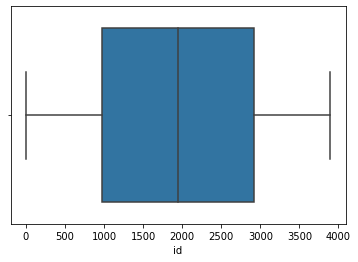

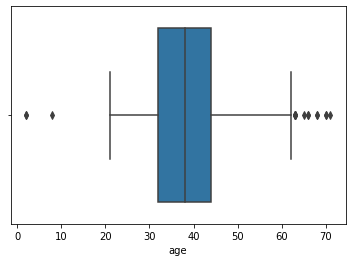

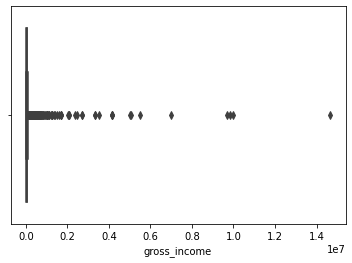

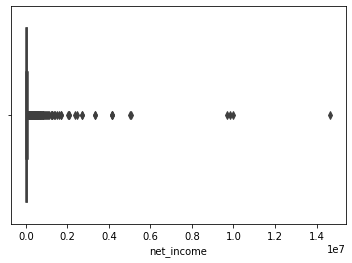

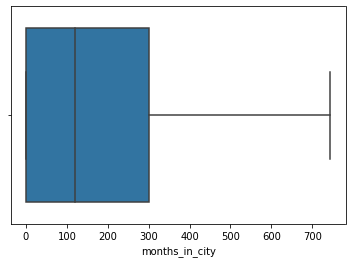

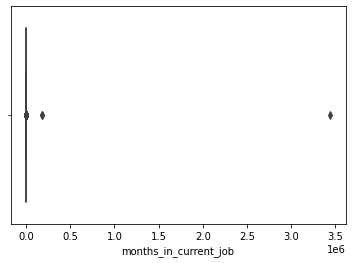

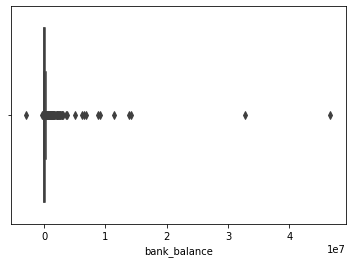

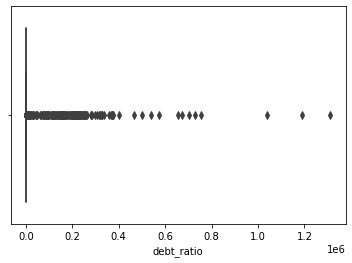

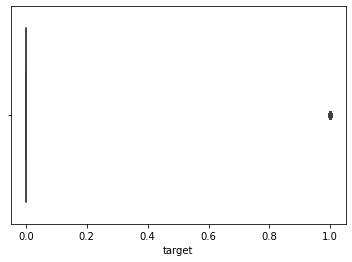

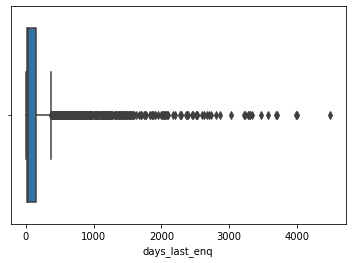

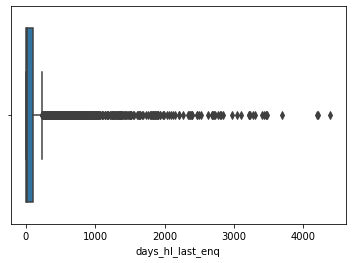

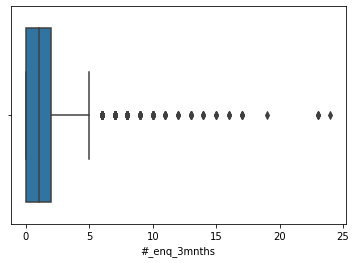

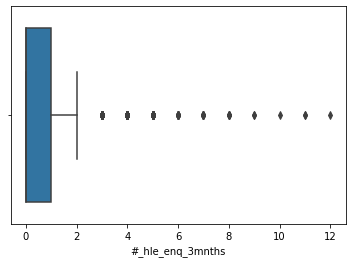

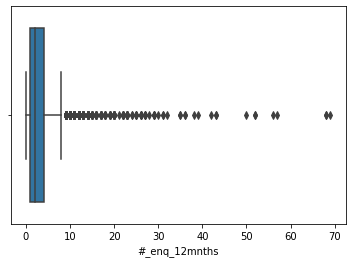

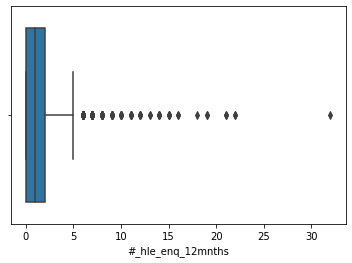

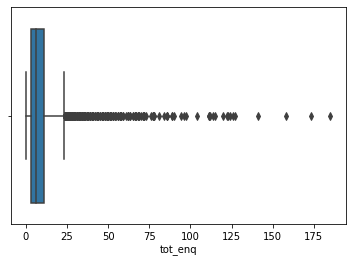

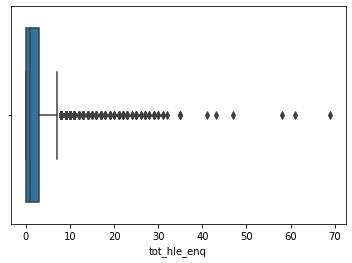

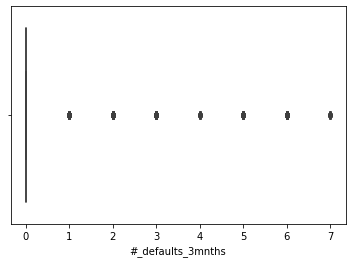

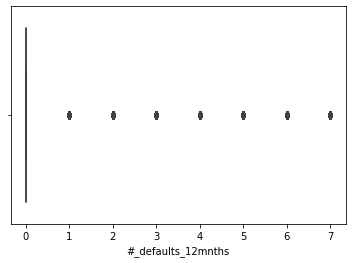

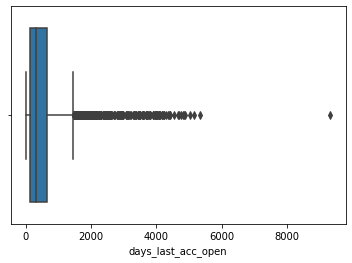

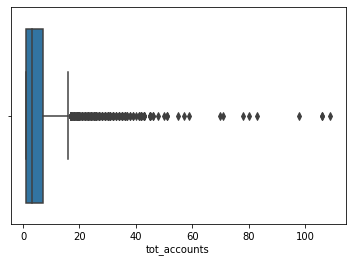

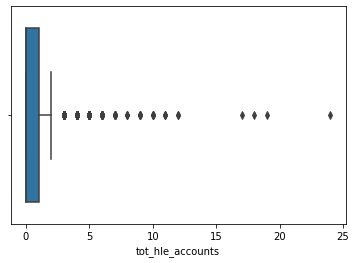

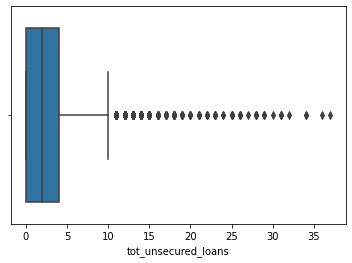

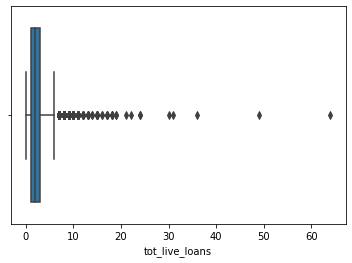

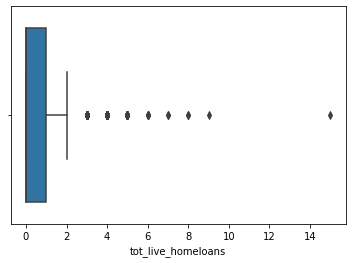

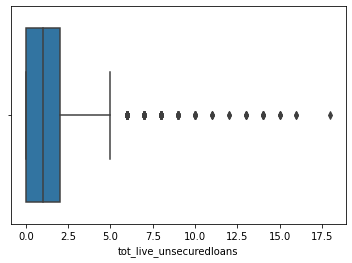

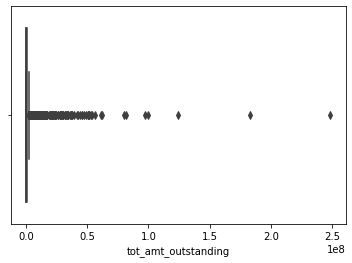

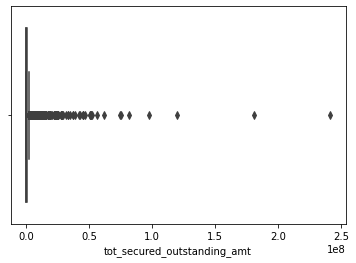

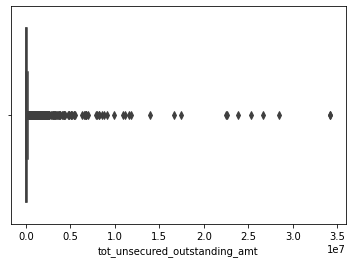

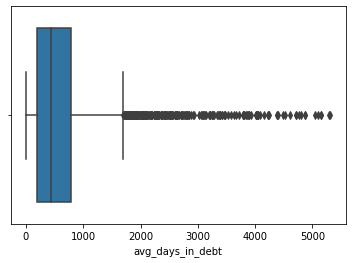

In [22]:
# Boxplot for every column
for column in df1:
        plt.figure()
        sns.boxplot(data=df1, x=column)

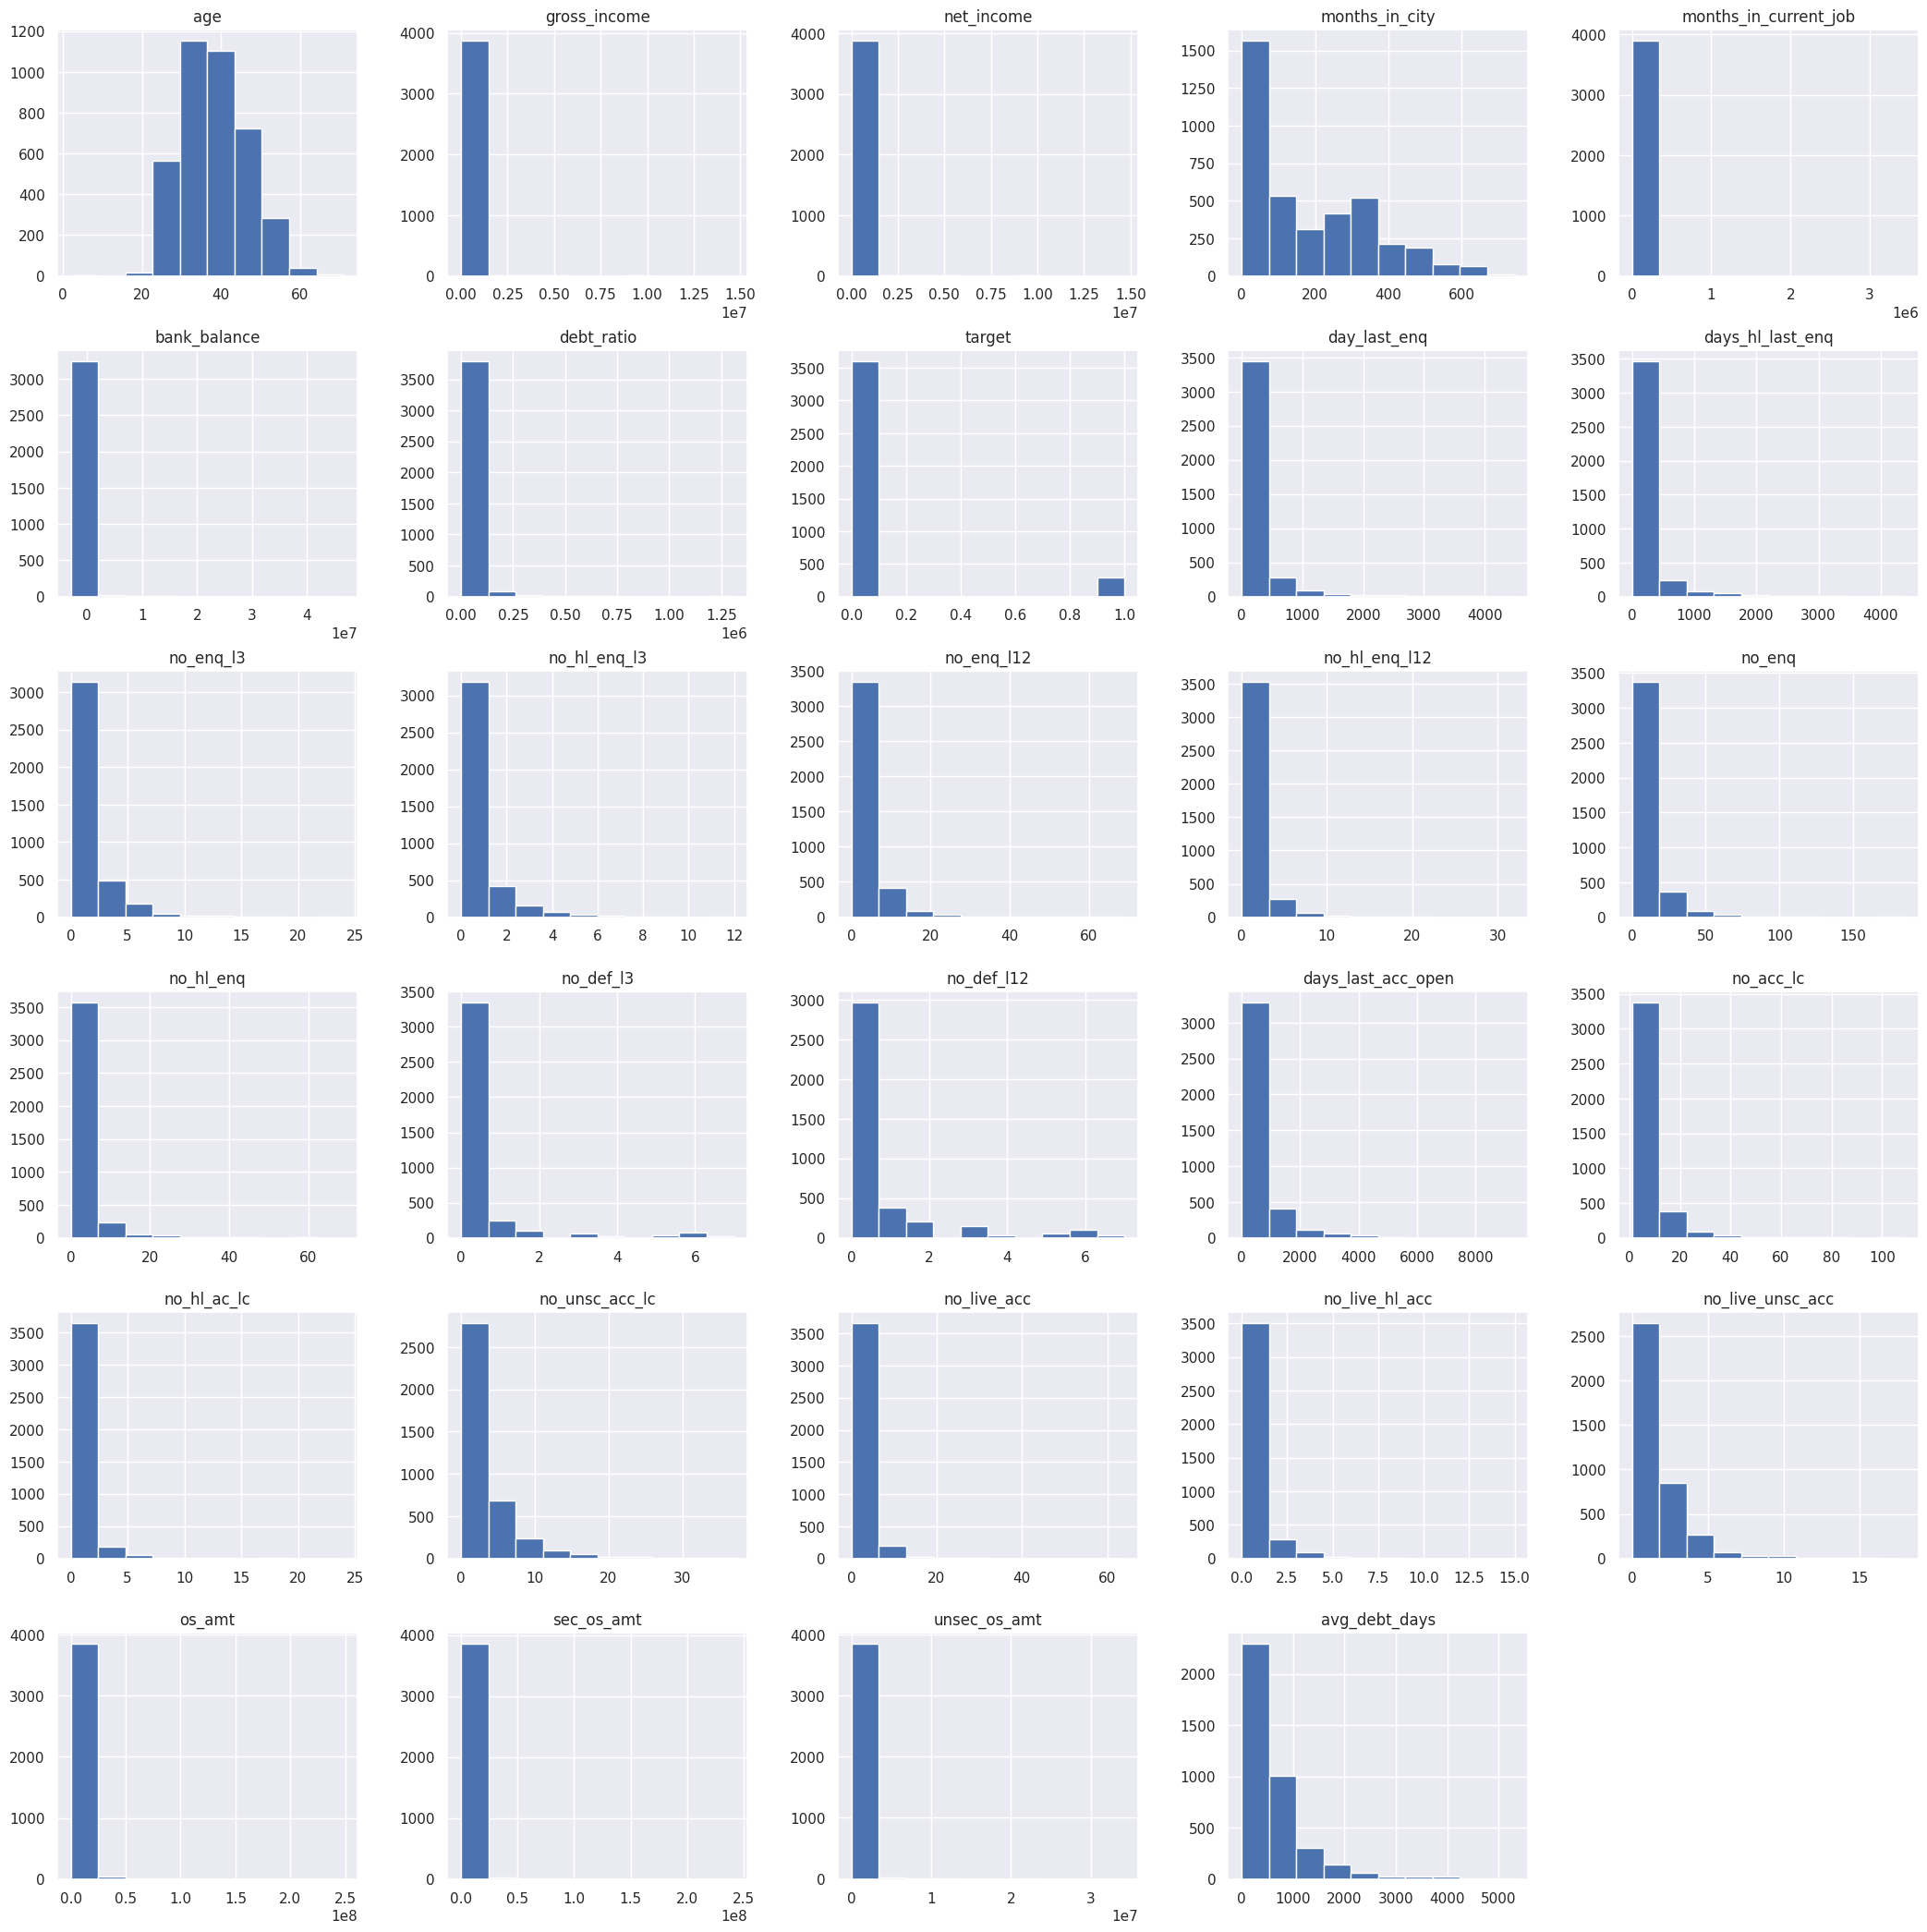

In [ ]:
df1.hist(column=df1.columns.tolist()[1:],figsize=(26,26));

In [23]:
# Outlier Analysis
cols = df1.columns
for c in cols:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('Total Number of outliers in {} : {}'.format(c,len(Outliers)))
    print('\n')

Total Number of outliers in id : 0


Total Number of outliers in age : 0


Total Number of outliers in gross_income : 458


Total Number of outliers in net_income : 375


Total Number of outliers in months_in_city : 0


Total Number of outliers in months_in_current_job : 130


Total Number of outliers in bank_balance : 290


Total Number of outliers in debt_ratio : 474


Total Number of outliers in target : 298


Total Number of outliers in days_last_enq : 547


Total Number of outliers in days_hl_last_enq : 647


Total Number of outliers in #_enq_3mnths : 187


Total Number of outliers in #_hle_enq_3mnths : 293


Total Number of outliers in #_enq_12mnths : 361


Total Number of outliers in #_hle_enq_12mnths : 139


Total Number of outliers in tot_enq : 361


Total Number of outliers in tot_hle_enq : 256


Total Number of outliers in #_defaults_3mnths : 552


Total Number of outliers in #_defaults_12mnths : 933


Total Number of outliers in days_last_acc_open : 323


Total Number of ou

**Categorical Variable**

In [24]:
# Dataframe of numeric variable
df2= df.select_dtypes(include=['object'])

In [25]:
# Description of categorical features
df2.describe()

,customer_type,sex,type_of_industry,marital_status,org_type
count,3894,3890,3889,3890,3894
unique,3,2,80,5,11
top,SELF EMPLOYED,MALE,OTHERS,MARRIED,INDIVIDUAL
freq,2202,3278,3190,3467,2787


In [26]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

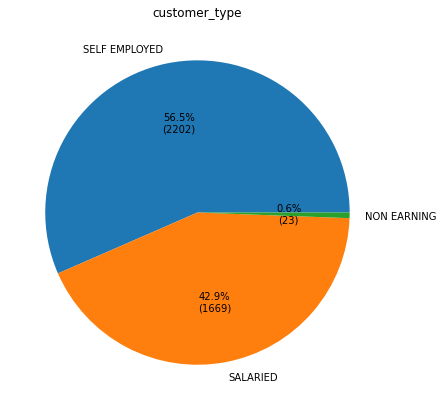

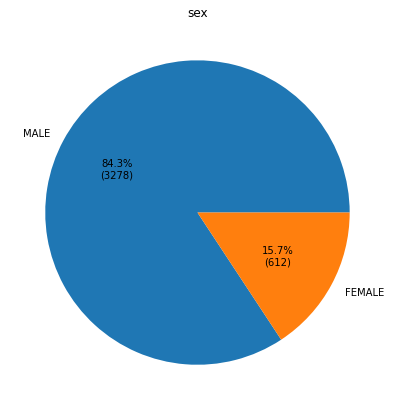

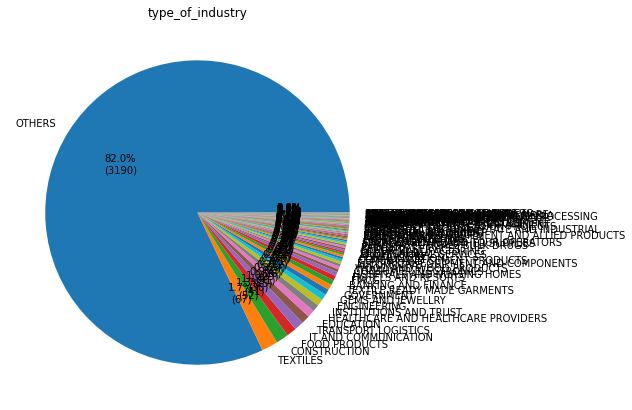

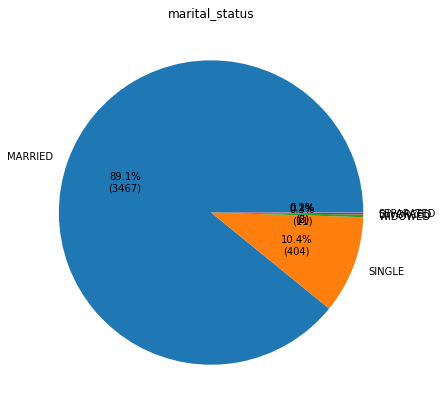

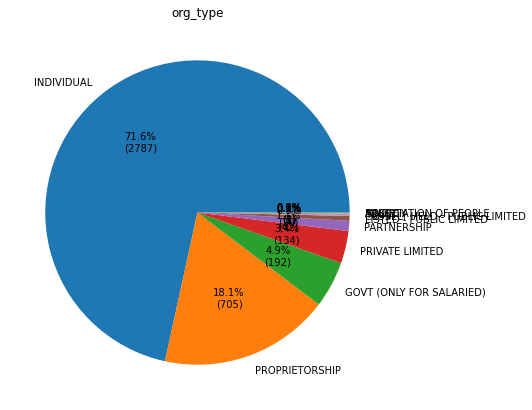

In [27]:
for column in df2:
        plt.figure(figsize = (7,7))
        s = df2[column].value_counts()
        plt.pie(s,labels = s.index, autopct=autopct_format(s))
        plt.title(column)

## Bivariate Analysis

**Numerical Variables**

<ipython-input-29-d3d47a473742>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


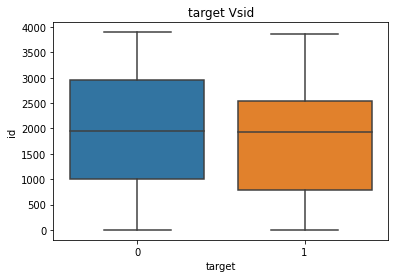

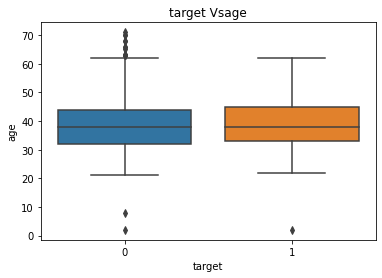

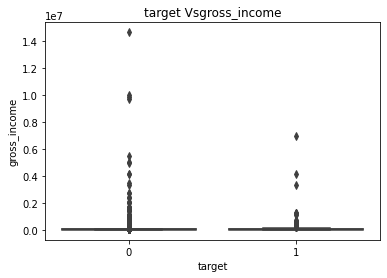

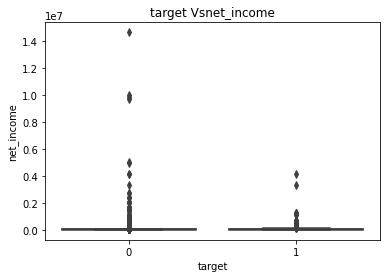

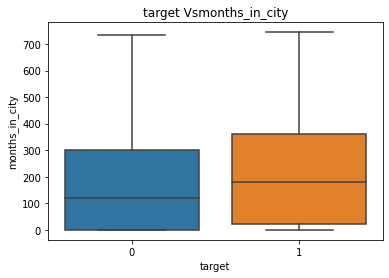

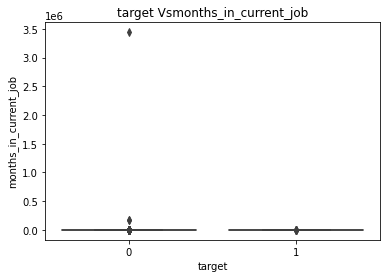

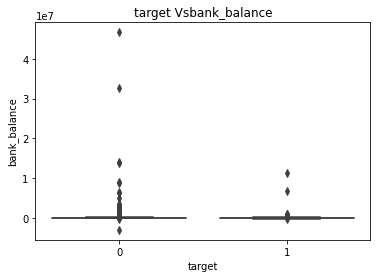

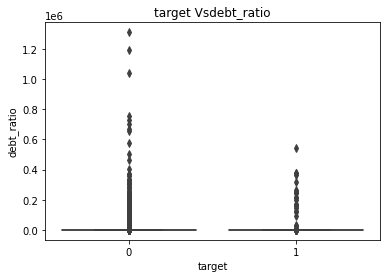

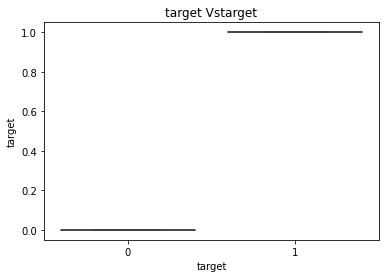

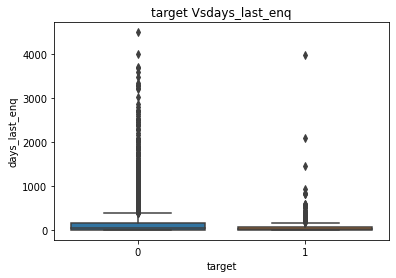

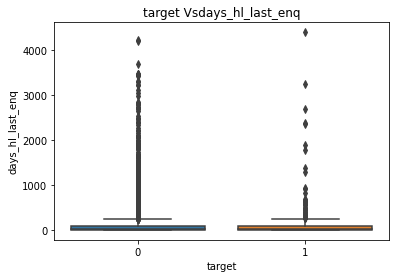

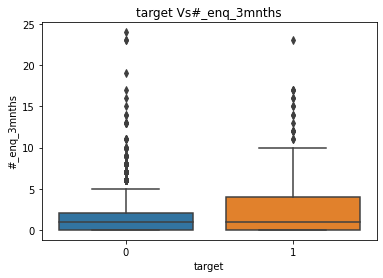

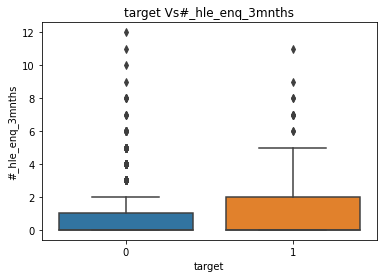

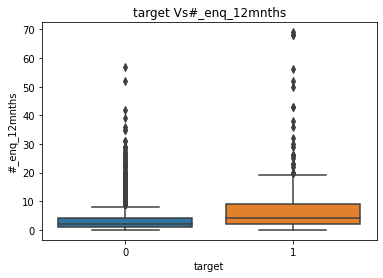

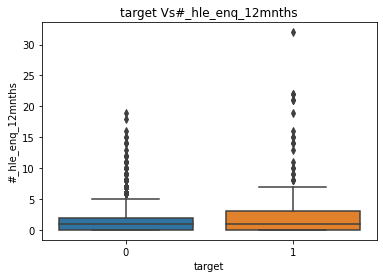

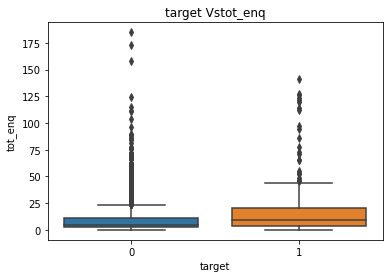

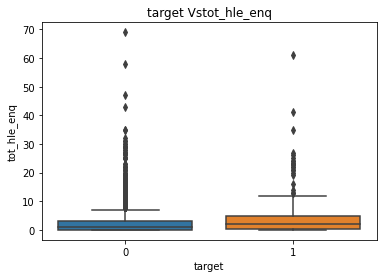

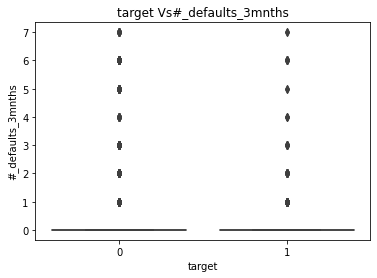

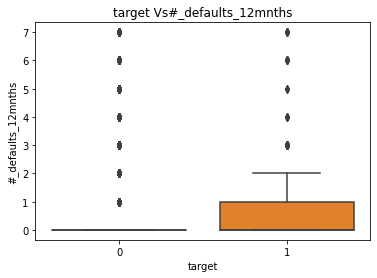

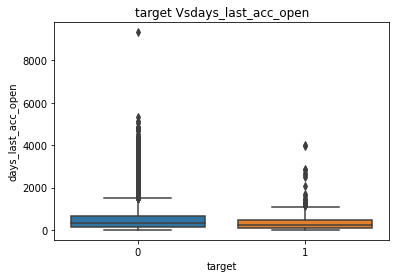

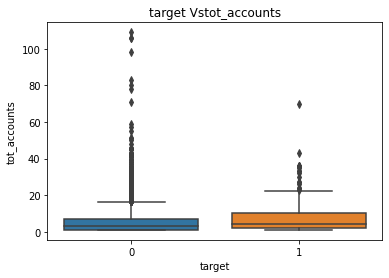

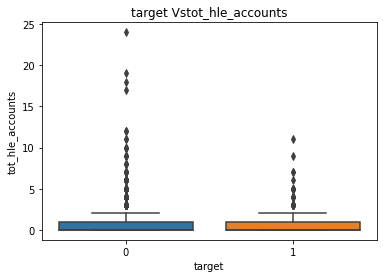

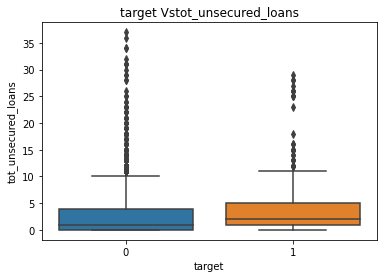

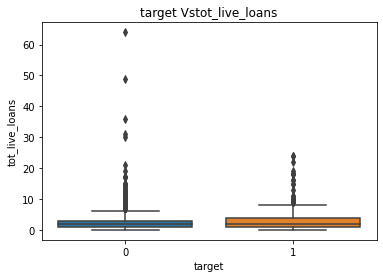

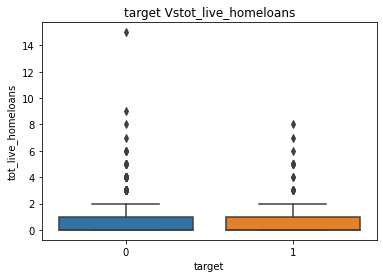

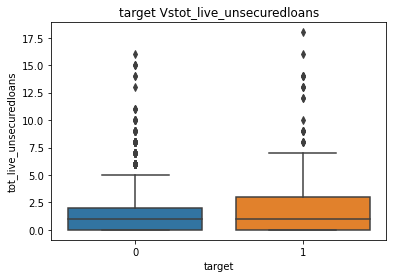

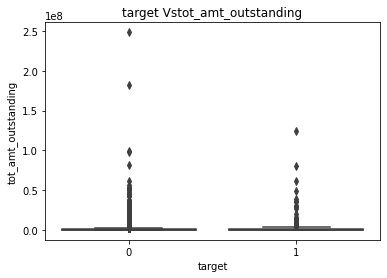

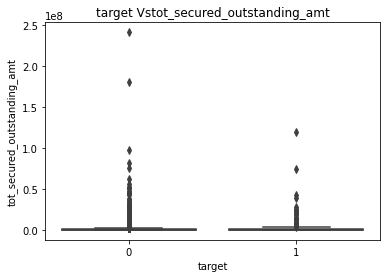

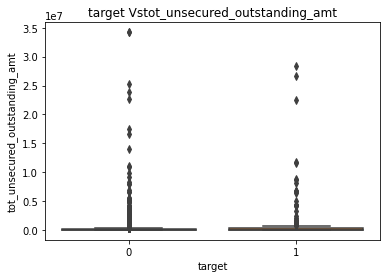

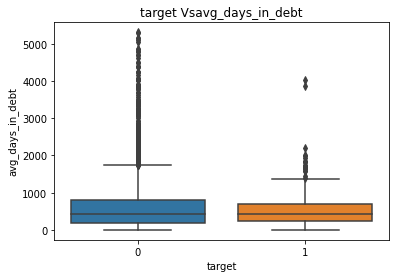

In [29]:
for column in df1:
  plt.figure()
  sns.boxplot(x='target', y=column, data= df)
  plt.title('target Vs' + column)

<ipython-input-30-a237a98ce390>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

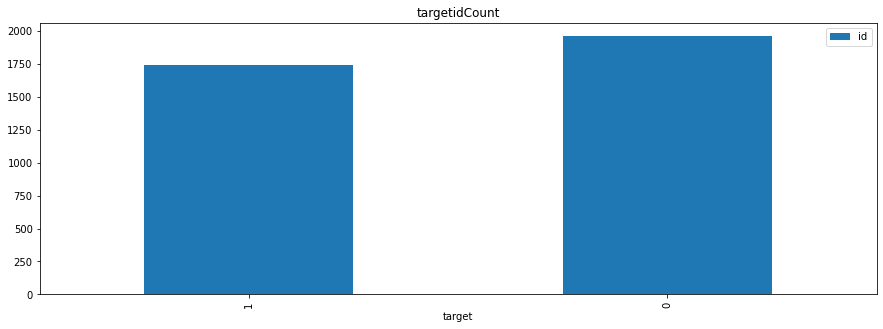

<Figure size 432x288 with 0 Axes>

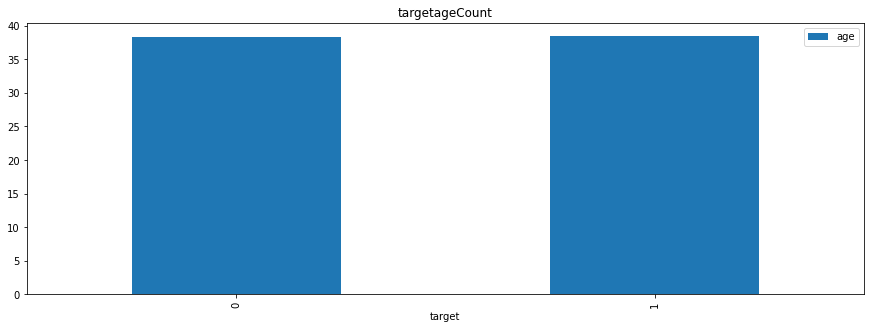

<Figure size 432x288 with 0 Axes>

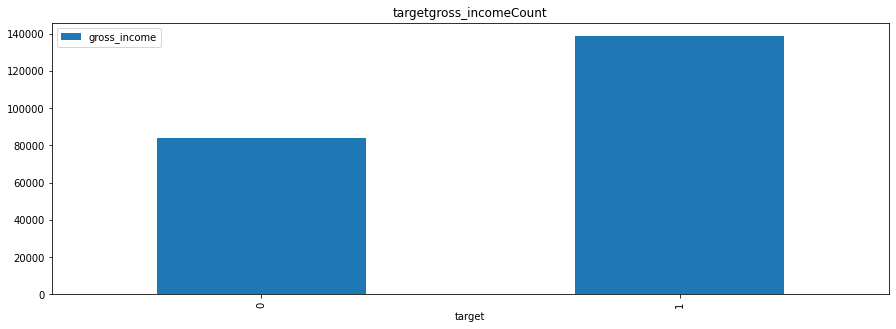

<Figure size 432x288 with 0 Axes>

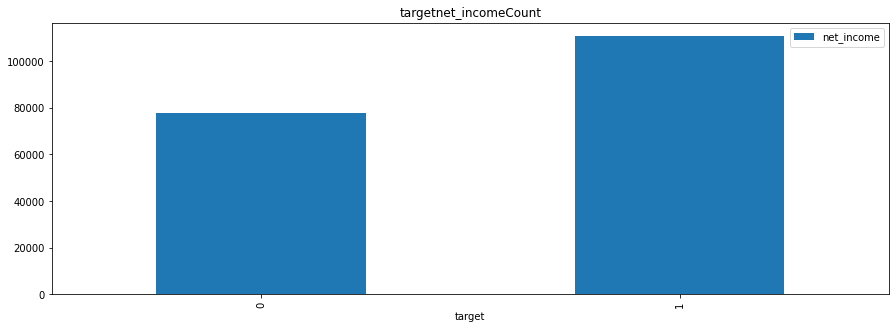

<Figure size 432x288 with 0 Axes>

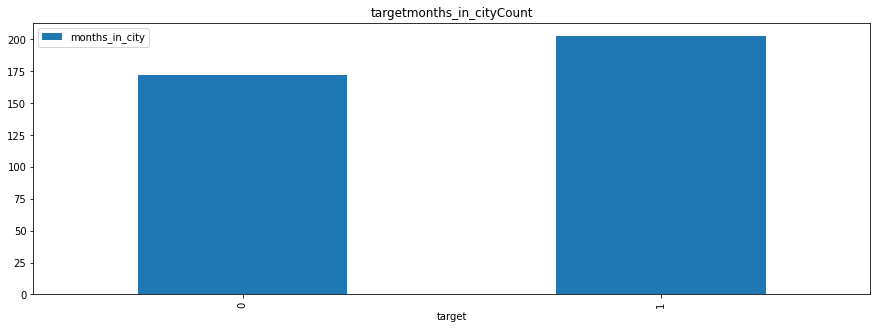

<Figure size 432x288 with 0 Axes>

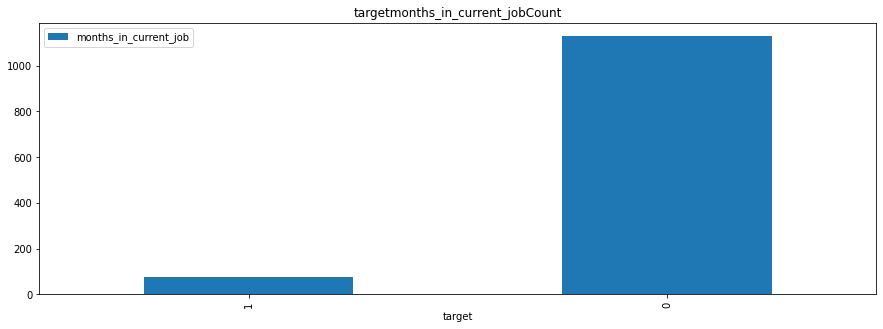

<Figure size 432x288 with 0 Axes>

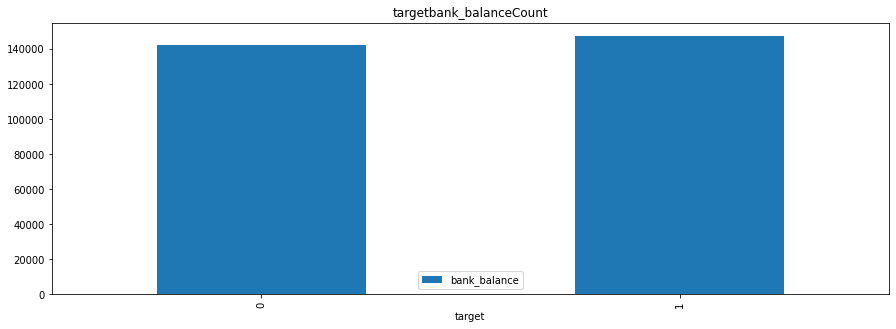

<Figure size 432x288 with 0 Axes>

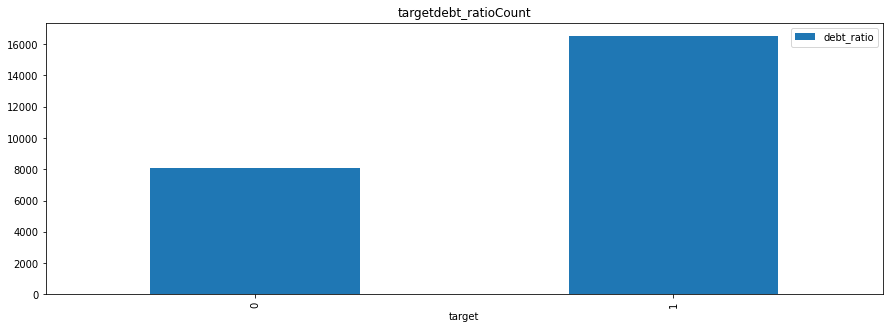

<Figure size 432x288 with 0 Axes>

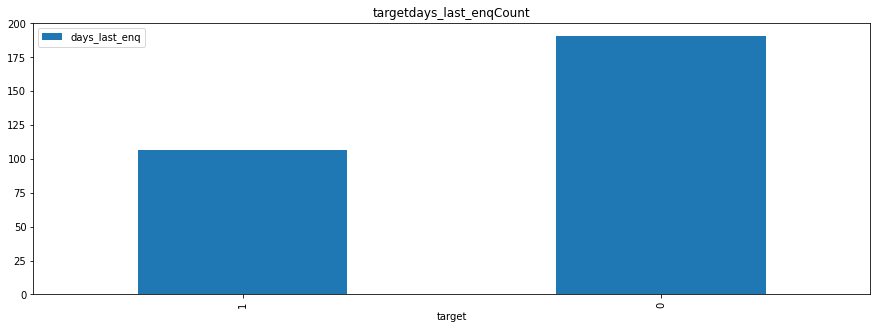

<Figure size 432x288 with 0 Axes>

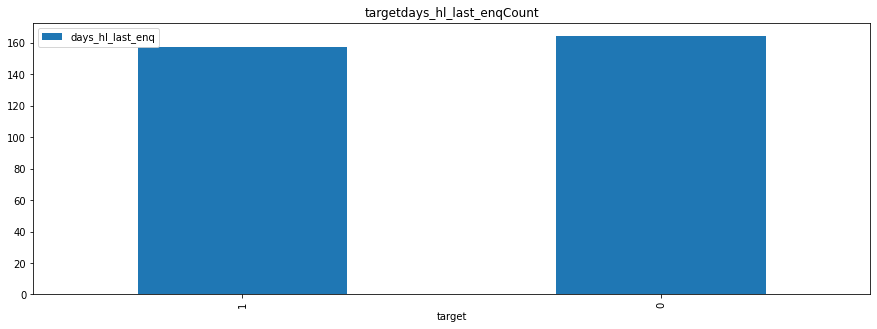

<Figure size 432x288 with 0 Axes>

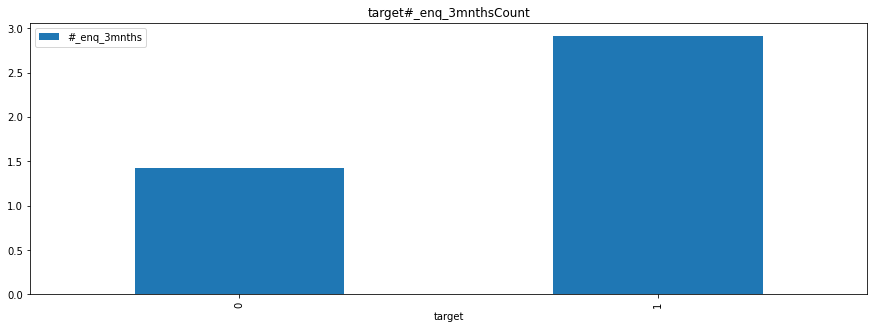

<Figure size 432x288 with 0 Axes>

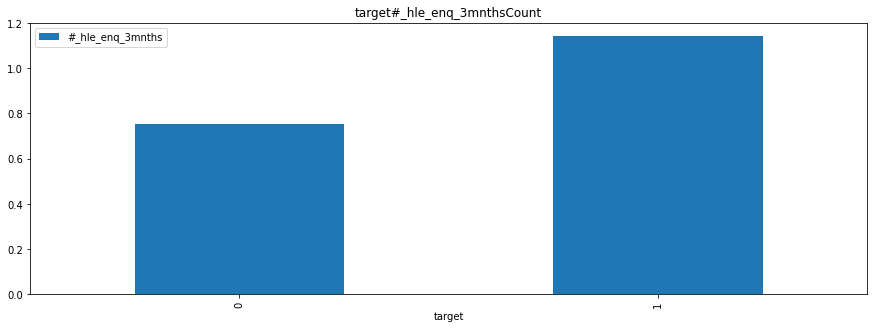

<Figure size 432x288 with 0 Axes>

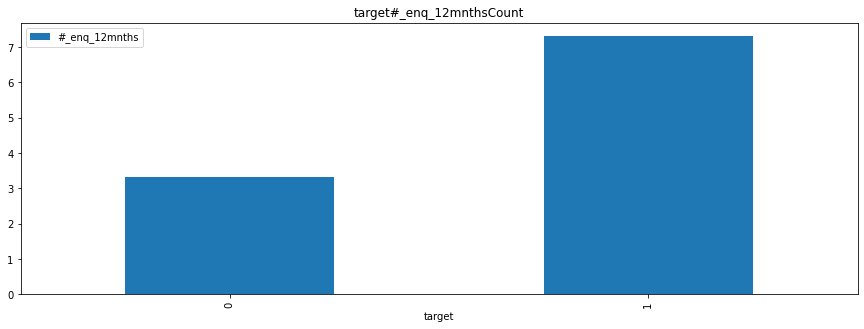

<Figure size 432x288 with 0 Axes>

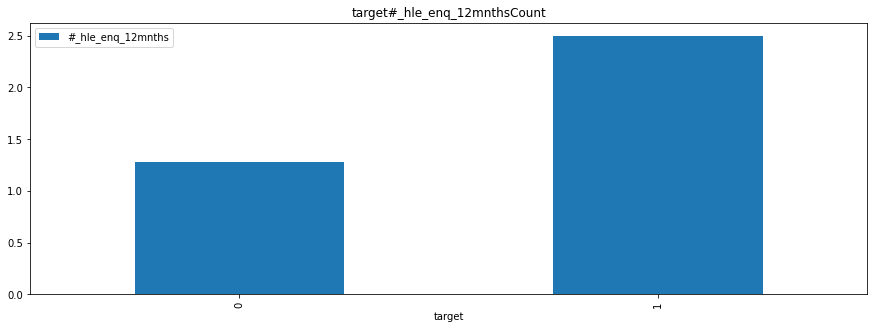

<Figure size 432x288 with 0 Axes>

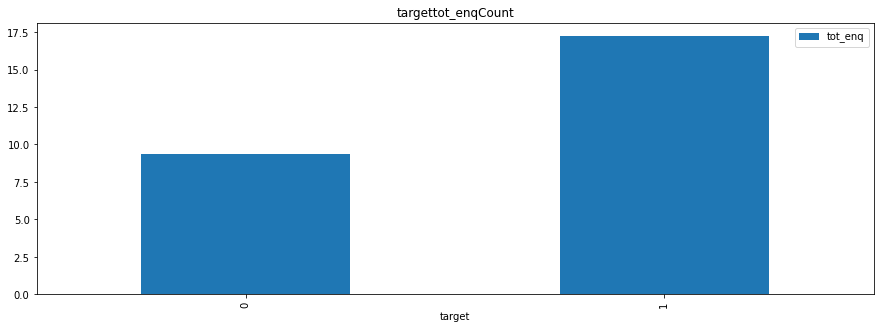

<Figure size 432x288 with 0 Axes>

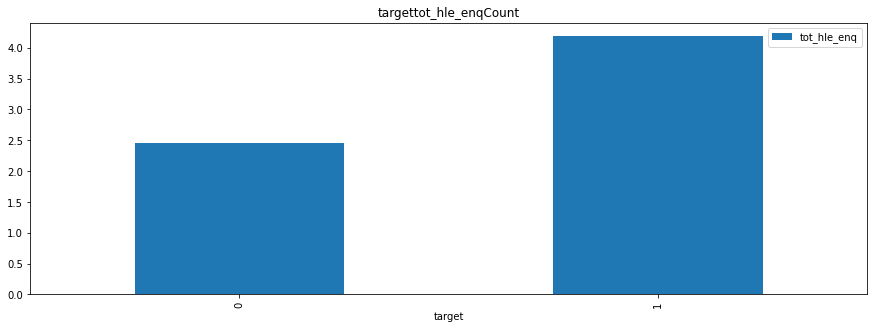

<Figure size 432x288 with 0 Axes>

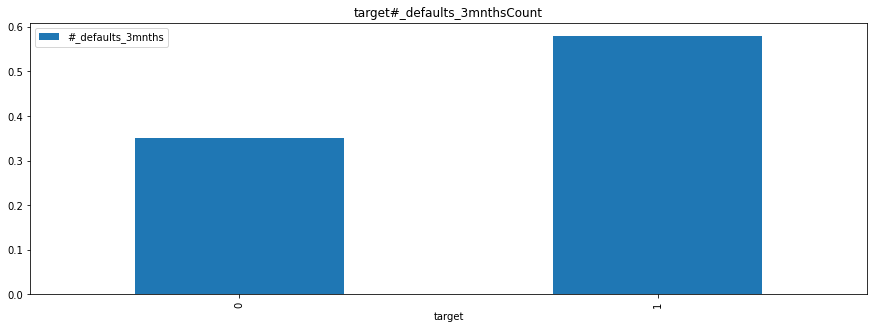

<Figure size 432x288 with 0 Axes>

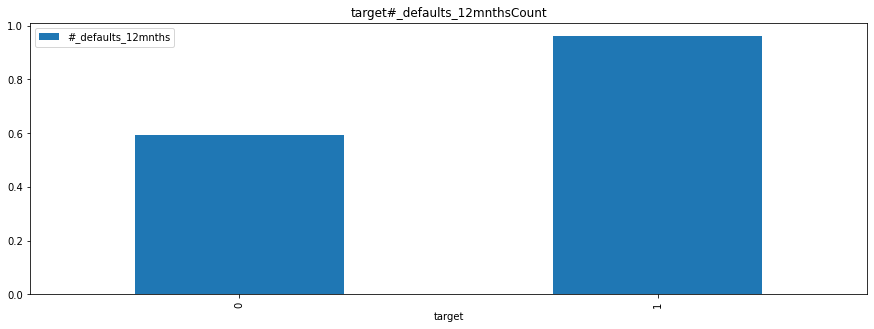

<Figure size 432x288 with 0 Axes>

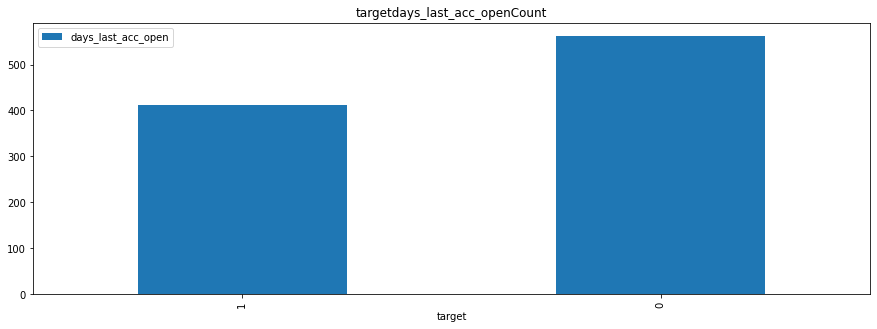

<Figure size 432x288 with 0 Axes>

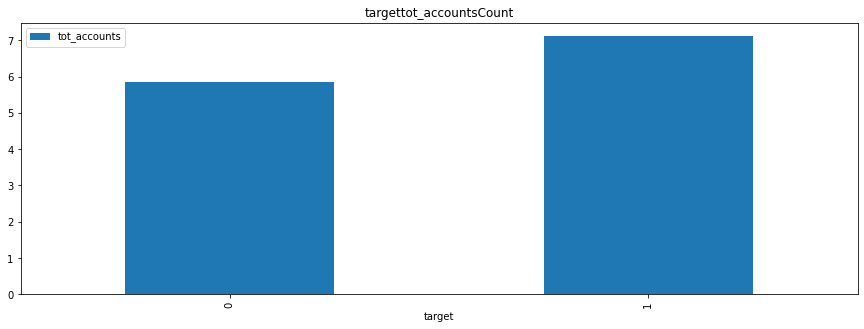

<Figure size 432x288 with 0 Axes>

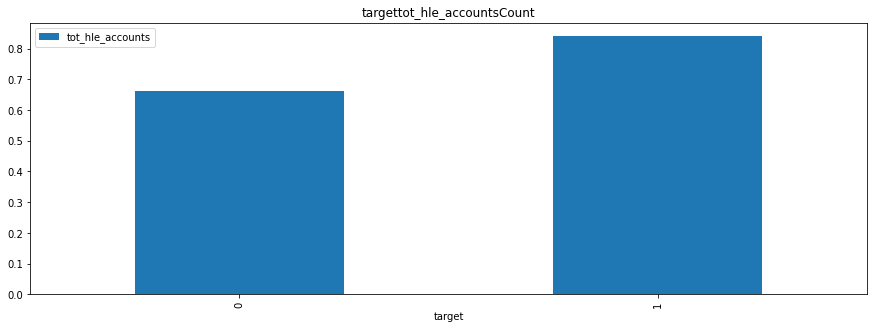

<Figure size 432x288 with 0 Axes>

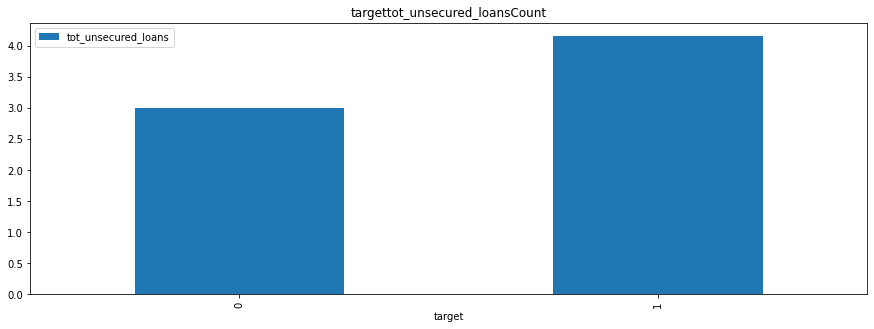

<Figure size 432x288 with 0 Axes>

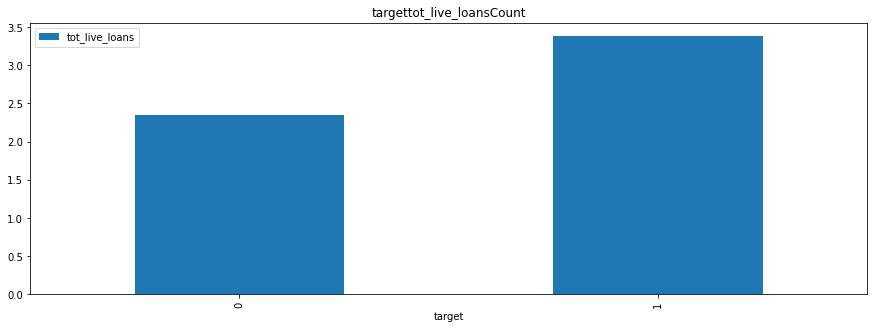

<Figure size 432x288 with 0 Axes>

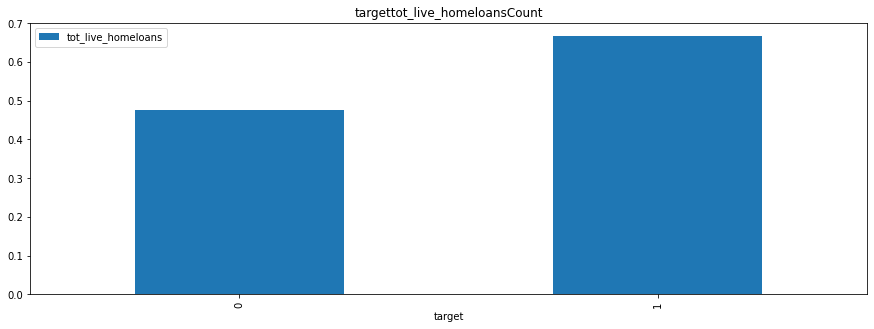

<Figure size 432x288 with 0 Axes>

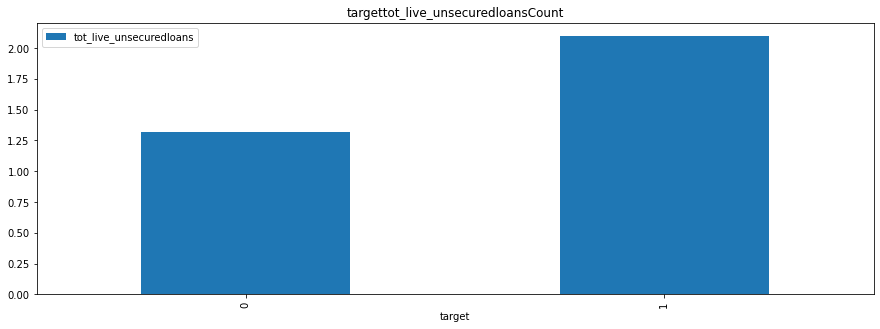

<Figure size 432x288 with 0 Axes>

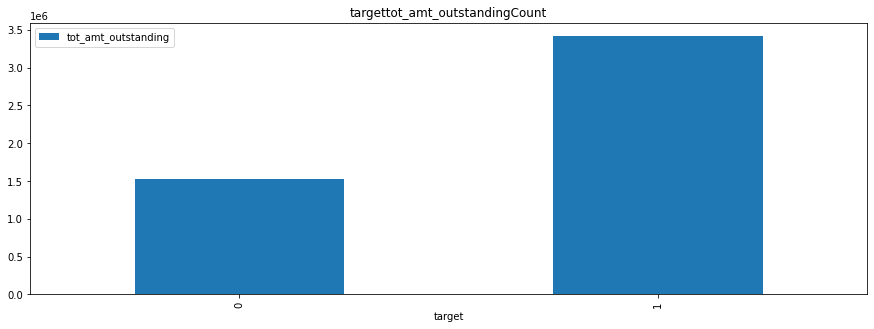

<Figure size 432x288 with 0 Axes>

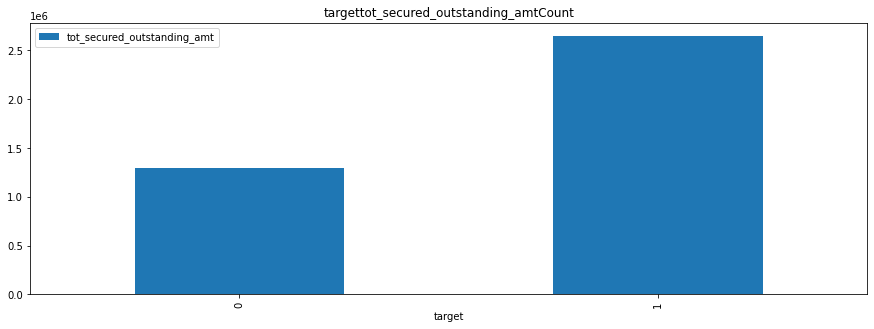

<Figure size 432x288 with 0 Axes>

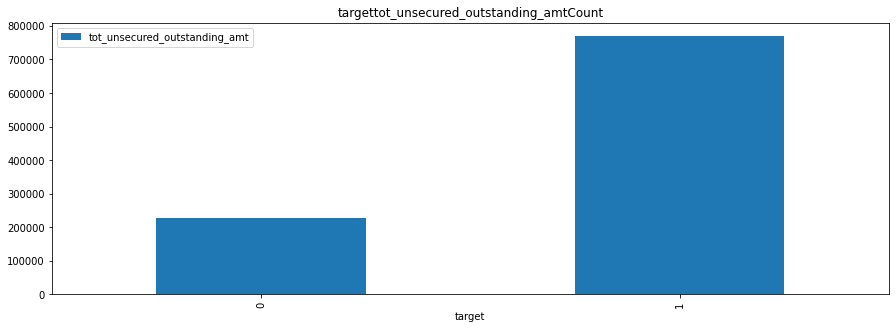

<Figure size 432x288 with 0 Axes>

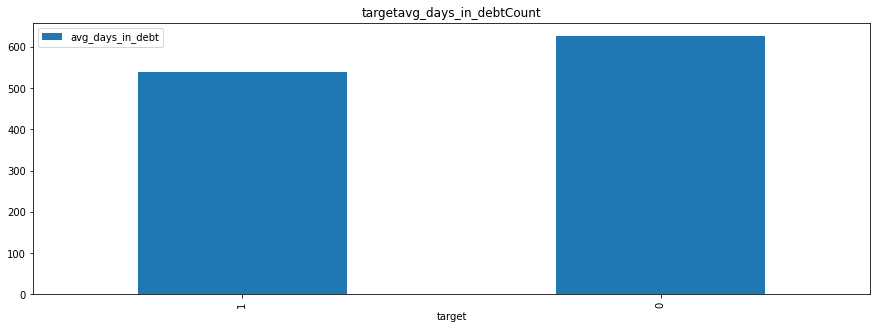

In [30]:
df1 = df1.drop(['target'], axis = 1)
for column in df1:
  plt.figure()
  df.groupby(by=['target'])[column].mean().reset_index().sort_values([column]).tail(10).plot(x='target',
                                                                                           y= column,
                                                                                           kind='bar',
                                                                                           figsize=(15,5))
  plt.title('target' + column + 'Count')

**Categorical Variable**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

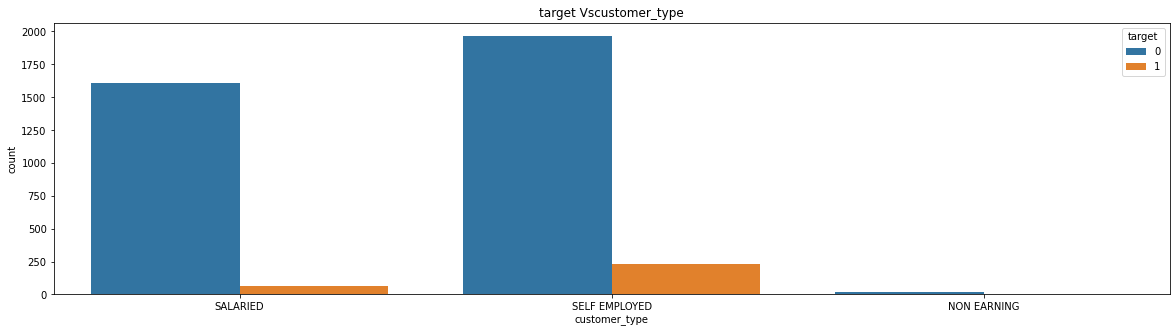

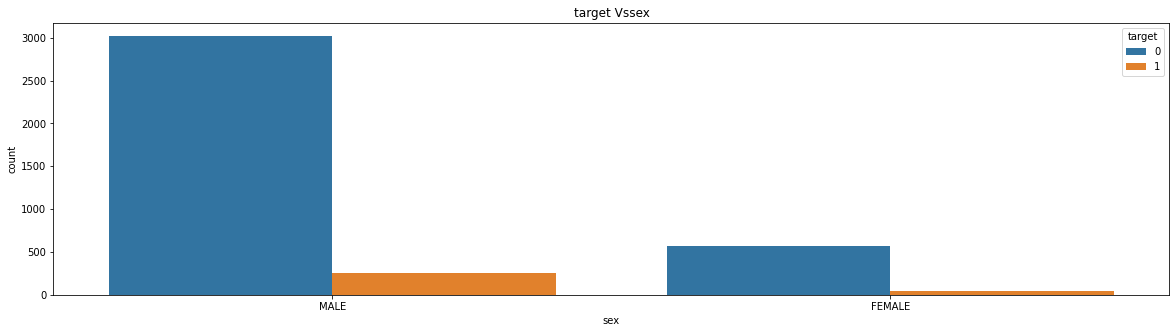

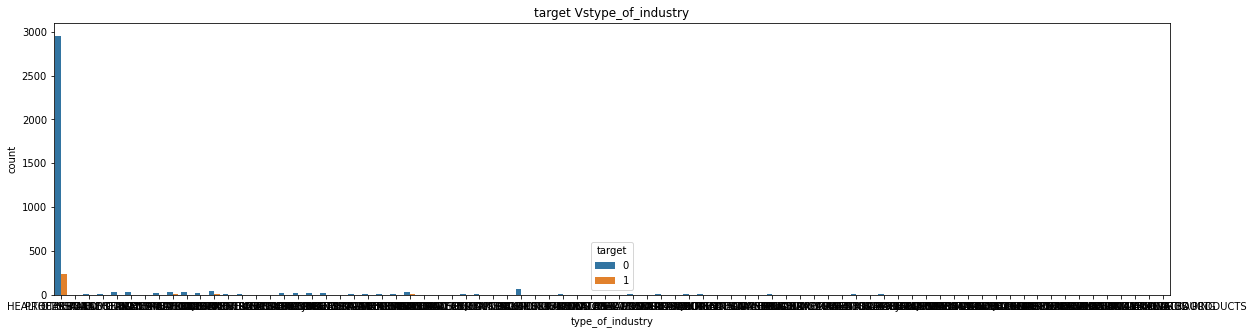

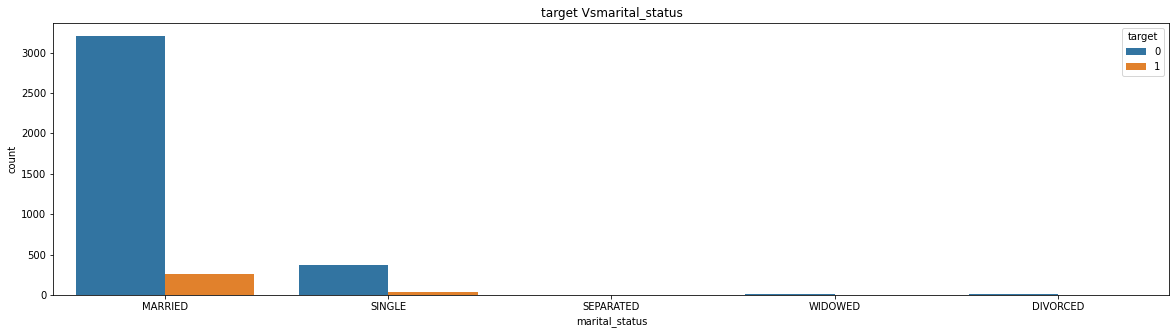

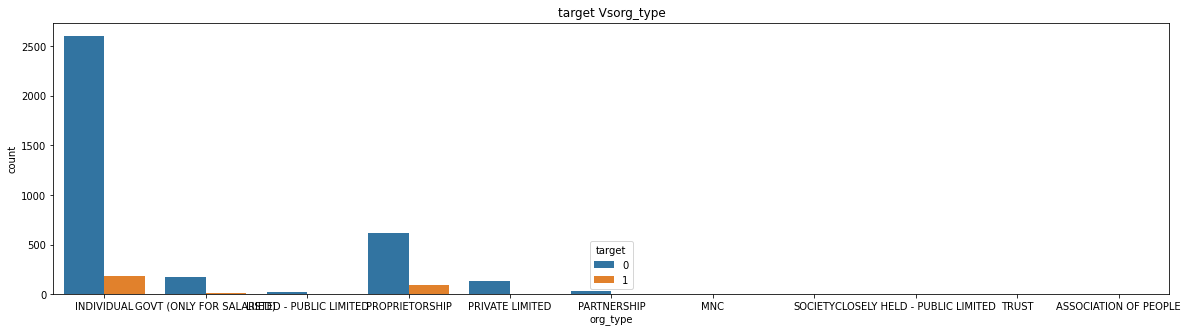

In [31]:
for column in df2:
  plt.figure(figsize = (20,5))
  sns.countplot(df[column], hue = df['target'])
  plt.title('target Vs' + column)

## Multivariate Analysis



In [ ]:
df.groupby(['sex','target'])['bank_balance'].mean()

sex     target
FEMALE  0        177991.011
        1        676026.536
MALE    0        136612.720
        1         71757.783
Name: bank_balance, dtype: float64

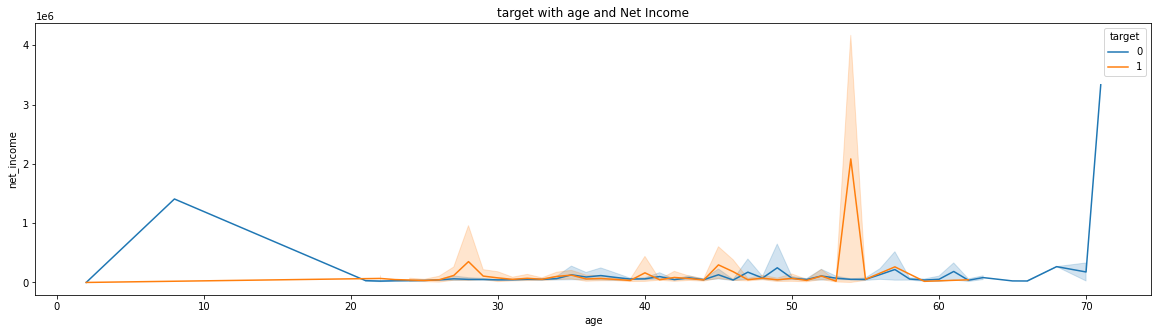

In [33]:
plt.figure(figsize=(20,5))
sns.lineplot(x="age", y="net_income", hue = 'target',  data=df)
plt.title('target with age and Net Income')
plt.show()

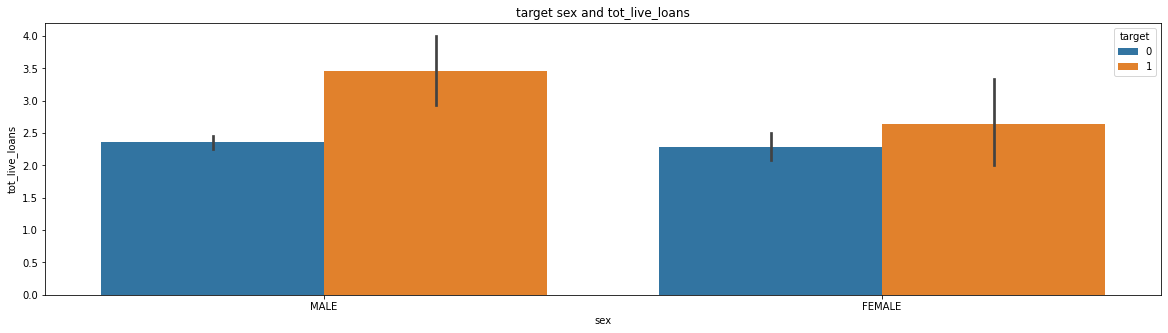

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x="sex", y="tot_live_loans", hue = 'target',  data=df)
plt.title('target sex and tot_live_loans')
plt.show()

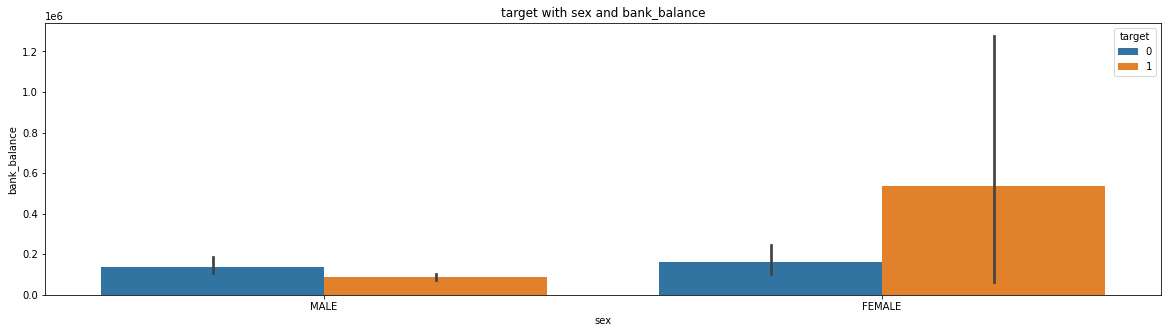

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(x="sex", y="bank_balance", hue = 'target',  data=df)
plt.title('target with sex and bank_balance')
plt.show()

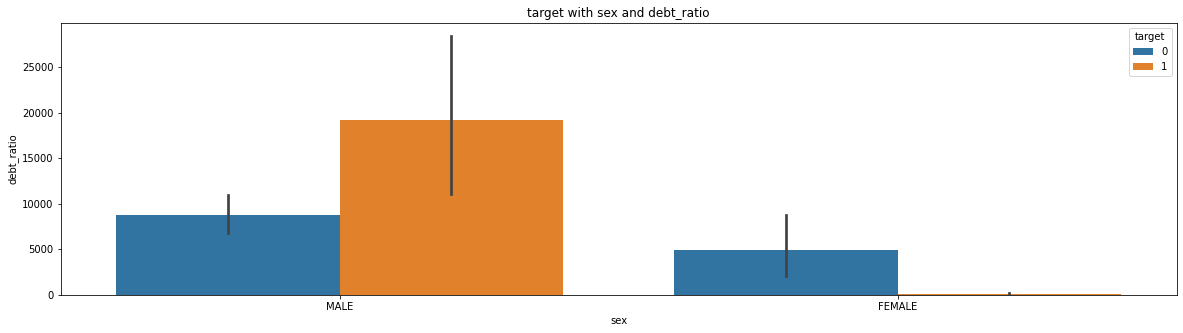

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(x="sex", y="debt_ratio", hue = 'target',  data=df)
plt.title('target with sex and debt_ratio')
plt.show()

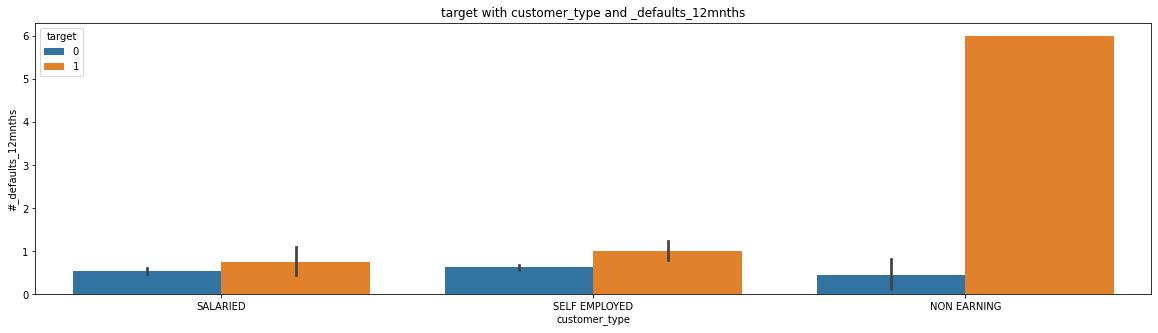

In [37]:
plt.figure(figsize=(20,5))
sns.barplot(x="customer_type", y="#_defaults_12mnths", hue = 'target',  data=df)
plt.title('target with customer_type and _defaults_12mnths')
plt.show()

# 3. Variable Creation

In [ ]:
# List of columns
col = df.describe().columns.to_list()

In [ ]:
# Removing target variable
col.remove("id")
col.remove('target')

In [ ]:
# Additional variable creation
for i in col:
    for j in col:
        if i != j:
            df_copy[i+"_"+j] = df_copy[i]/df_copy[j]

(3885, 791)


In [ ]:
df_copy.shape

# 4. Variable Reduction


### Feature Importance by IV

In [ ]:
# Creating list of column
cols = df_copy.columns.tolist()

In [ ]:
# Removing target variables
cols.remove("id")
cols.remove("target")

In [ ]:
# Creating dataframe
info_val_df  = pd.DataFrame()
iv = {}
norun= []

for i in cols:
    try:
        if df_copy[i].dtype != 'object':
            temp = df_copy[[i,"target"]].assign(bins=pd.qcut(df_copy[i],10,duplicates='drop'))
            tab =  pd.crosstab(index=temp.bins,columns=temp["target"],values=temp.index,aggfunc="count").rename(columns={0:'bad',1:'good'}).assign(badpercent=lambda x : x["bad"]/sum(x["bad"]),
                   goodpercent =lambda x : x["good"]/sum(x["good"]),
                   WoE = lambda x:np.log(x.goodpercent/x.badpercent),

                   IV_values =  lambda x : x.WoE *(x.goodpercent-x.badpercent),
                   IV = lambda x : sum(x.IV_values))
                        
            tab['name'] = i
            info_val_df = info_val_df.append(tab)
            iv[i] = sum(tab["IV_values"])

        else:
            tab =  pd.crosstab(index=df_copy[i],columns=df_copy["target"],values=df_copy["id"],aggfunc="count").rename(columns={0:'bad',1:'good'}).assign(badpercent=lambda x : x["bad"]/sum(x["bad"]),
            goodpercent =lambda x : x["good"]/sum(x["good"]),
            WoE = lambda x:np.log(x.goodpercent/x.badpercent),
            IV_values =  lambda x : x.WoE *(x.goodpercent-x.badpercent),
            IV = lambda x : sum(x.IV_values))
            iv[i] = sum(tab["IV_values"])
            tab['name'] = i
            info_val_df = info_val_df.append(tab)
  
            
            
    except:
        norun.append(i)

In [ ]:
df_copy.drop(columns=norun,inplace=True)
print(df_copy.shape)

644
(3885, 791)
(3885, 147)


In [ ]:
df_iv  = (pd.DataFrame.from_dict([iv]).T).rename(columns={0:"IV"})
iv_cols = df_iv.sort_values(by="IV",ascending=False)[:13].index.tolist()
df_iv.sort_values(by="IV",ascending=False)[:16]

,Information_Value
no_enq_l12_age,0.315
no_enq_l12,0.313
customer_type,0.267
no_enq_l3,0.263
no_hl_enq_l3_no_enq_l3,0.243
no_enq_l3_age,0.233
no_enq_age,0.227
no_enq,0.226
net_income_age,0.222
net_income,0.208


In [ ]:
df_copy.fillna(-1,inplace=True)

### Feature Importance by Random Forest

In [ ]:
X = df_copy.drop(columns=["type_of_industry","id"])
X = pd.get_dummies(data=X,columns=X.select_dtypes("O").columns.to_list(),drop_first=True)
y = df_copy.target

In [ ]:
# Random Forest
rf_model = RandomForestClassifier().fit(X,y)

In [ ]:
sorted_feature_importance = rf_model.feature_importances_.argsort()
rf_cols = X.columns[sorted_feature_importance][:16].tolist()

## Variable Clustering

In [ ]:
x = df_copy.drop(columns=["id","target"])
x = x[x.select_dtypes(["int64",'float64']).columns.to_list()]

In [ ]:
varclus_model = VarClusHi(x, maxeigval2=1, maxclus=12)
varclus_model.varclus()

In [ ]:
varclus_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,no_enq_l12,0.533,0.351,0.720
1,0,no_enq,0.664,0.340,0.509
2,0,no_acc_lc,0.615,0.211,0.488
3,0,no_unsc_acc_lc,0.686,0.236,0.411
4,0,no_live_acc,0.711,0.323,0.427
...,...,...,...,...,...
135,11,no_enq_no_acc_lc,0.418,0.076,0.630
136,11,no_hl_enq_no_acc_lc,0.422,0.146,0.677
137,11,no_def_l3_no_acc_lc,0.010,0.327,1.471
138,11,no_def_l12_no_acc_lc,0.013,0.279,1.369


In [ ]:
varclus_cols = varclus_model.rsquare.sort_values(by="RS_Ratio").Variable.tolist()[:12]

In [ ]:
num_cols = df_copy.select_dtypes("number").columns.tolist()

In [ ]:
final_cols = [col for col in num_cols if (col in iv_cols) or (col in rf_cols) or (col in varclus_cols)] 
cat_cols = ['org_type','marital_status','sex',"target","id"]
final_cols.extend(cat_cols)

<AxesSubplot: >

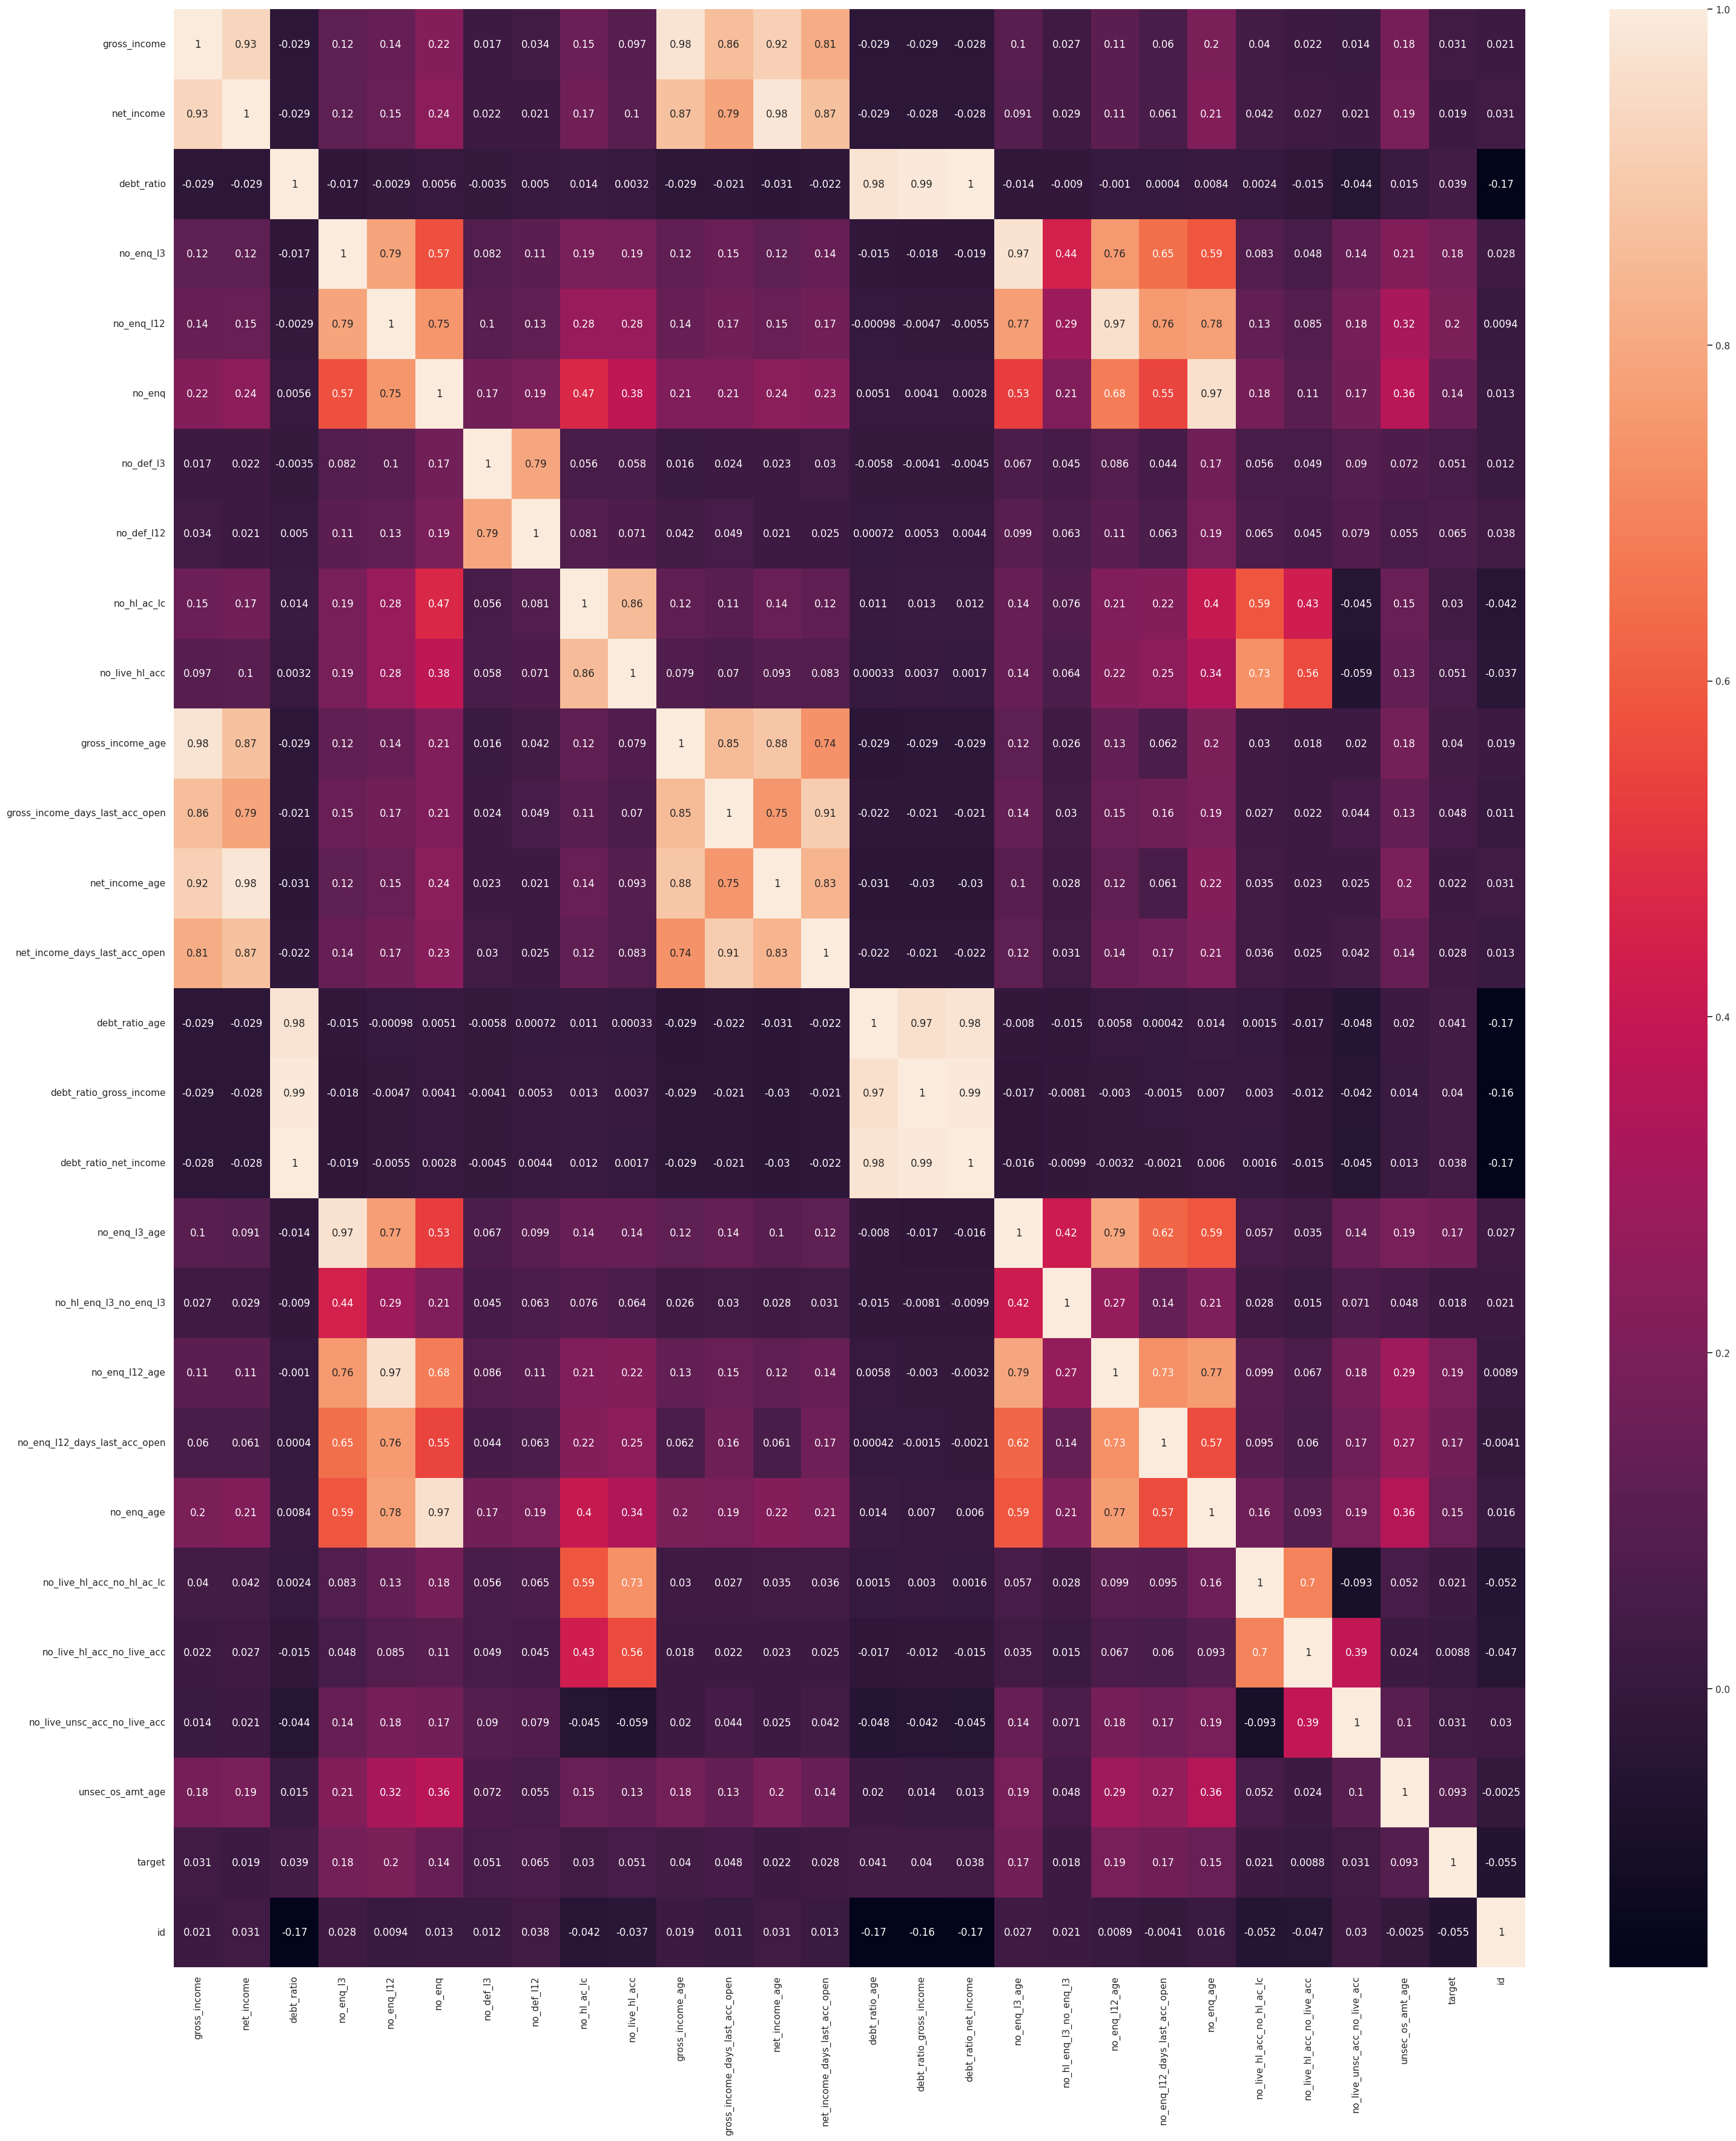

In [ ]:
# Correlation
df_fin = df_copy.loc[:,final_cols]
sns.heatmap(df_fin.corr(),annot=True)

In [ ]:
# Variance Inflation Factor
new = df_fin.select_dtypes("float64")
new = add_constant(new,prepend=True)

vif = pd.Series([variance_inflation_factor(new, i) 
               for i in range(new.shape[1])], 
              index=new.columns)[1:]
vif

gross_income                       317.894
net_income                         323.034
debt_ratio                        1288.451
gross_income_age                   403.311
gross_income_days_last_acc_open     87.155
net_income_age                     351.061
net_income_days_last_acc_open       76.196
debt_ratio_age                      20.901
debt_ratio_gross_income             83.992
debt_ratio_net_income             1358.531
no_enq_l3_age                        3.191
no_hl_enq_l3_no_enq_l3               1.266
no_enq_l12_age                       5.149
no_enq_l12_days_last_acc_open        2.426
no_enq_age                           2.730
no_live_hl_acc_no_hl_ac_lc           3.030
no_live_hl_acc_no_live_acc           3.406
no_live_unsc_acc_no_live_acc         1.868
unsec_os_amt_age                     1.200
dtype: float64

In [ ]:
# Dropping columns with VIF greater than 10
drop_cols = vif[vif>10].index.tolist()
df_fin.drop(columns=drop_cols,inplace=True)

In [ ]:
print(df_fin.shape)

# 5. Data Split

In [ ]:
X = df_fin.drop('target',axis=1)
y= df_fin.loc[:,"target"]

In [ ]:
cols = X.select_dtypes("O").columns.tolist()
X = pd.get_dummies(data=X,drop_first=True,columns=cols)

In [ ]:
#Splitting data at Dev : OOS , 70 : 30
X_tr,X_test,y_tr,y_test = train_test_split(X,y,test_size=0.3)

# 8. Final check before modelling


In [ ]:
new = X.select_dtypes("float64")
new = add_constant(new,prepend=True)

vif_n = pd.Series([variance_inflation_factor(new, i) 
               for i in range(new.shape[1])], 
              index=new.columns)[1:]
vif_n

no_enq_l3_age                   3.160
no_hl_enq_l3_no_enq_l3          1.259
no_enq_l12_age                  5.114
no_enq_l12_days_last_acc_open   2.252
no_enq_age                      2.637
no_live_hl_acc_no_hl_ac_lc      3.021
no_live_hl_acc_no_live_acc      3.397
no_live_unsc_acc_no_live_acc    1.857
unsec_os_amt_age                1.161
dtype: float64

# 9. Logistic Regression

In [ ]:
# Logistic Regression Model
logistic_mod = LogisticRegression()
logistic_mod = logistic_mod.fit(X_tr,y_tr)

In [ ]:
# Prediction
logistic_pred = logistic_mod.predict_proba(X_tr)[:,1]

In [ ]:
# ROC AUC Score
roc_auc_score(y_tr,logistic_mod.predict_proba(X_tr)[:,1])

0.6657340159542804

# 10. Lift table


In [ ]:
# Creating Dev dataframe
dev = pd.DataFrame({"no_enq_l3_age":X_tr["no_enq_l3_age"],"unsec_os_amt_age":X_tr['unsec_os_amt_age'],'predicted_prob_dev':logistic_pred,'target':y_tr})

In [ ]:
# ROC AUC Score
roc_auc_score(y_test,logistic_mod.predict_proba(X_test)[:,1])

0.6424695133414381

In [ ]:
# Creating
dev["bins"] = pd.qcut(dev["predicted_prob_dev"],10,duplicates='drop')
dev

,no_enq_l3_age,unsec_os_amt_age,predicted_prob_dev,target,bins
3387,0.061,0.000,0.263,0,"(0.155, 0.955]"
1748,0.100,106656.400,0.036,0,"(0.0326, 0.0419]"
2364,0.065,0.000,0.057,0,"(0.0501, 0.0588]"
359,0.031,0.000,0.073,0,"(0.0675, 0.0784]"
2422,0.029,758.971,0.064,0,"(0.0588, 0.0675]"
...,...,...,...,...,...
511,0.000,77689.980,0.024,0,"(-0.0009141, 0.0326]"
3091,0.000,0.000,0.049,0,"(0.0419, 0.0501]"
992,0.024,0.000,0.031,0,"(-0.0009141, 0.0326]"
3156,0.020,5220.857,0.032,0,"(-0.0009141, 0.0326]"


In [ ]:
oos["bins"] = pd.qcut(oos["predicted_prob_oos"],10,duplicates='drop')
oos

,no_enq_l3_age,unsec_os_amt_age,predicted_prob_oos,target,bins
2349,0.111,7372.178,0.080,0,"(0.0676, 0.0804]"
473,0.000,16422.286,0.066,0,"(0.0576, 0.0676]"
509,0.029,0.000,0.147,0,"(0.111, 0.155]"
125,0.067,2257.000,0.156,0,"(0.155, 0.926]"
592,0.025,0.000,0.033,0,"(0.0302, 0.0406]"
...,...,...,...,...,...
909,0.156,4146.750,0.097,0,"(0.0941, 0.111]"
883,0.032,29572.935,0.029,0,"(0.00398, 0.0302]"
1935,0.024,146.317,0.043,0,"(0.0406, 0.0476]"
3020,0.043,169.174,0.123,0,"(0.111, 0.155]"


In [ ]:
t = pd.pivot_table(index="bins",values='unsec_os_amt_age',columns='target',data=oos,aggfunc="count",margins=True,margins_name="Total").rename(columns={0:"Good",1:"Bad"})
t

target,Good,Bad,Total
bins,,,
"(0.00398, 0.0302]",115,2,117
"(0.0302, 0.0406]",113,4,117
"(0.0406, 0.0476]",108,8,116
"(0.0476, 0.0576]",110,7,117
"(0.0576, 0.0676]",113,3,116
"(0.0676, 0.0804]",114,3,117
"(0.0804, 0.0941]",107,9,116
"(0.0941, 0.111]",109,8,117
"(0.111, 0.155]",106,10,116


## DEV
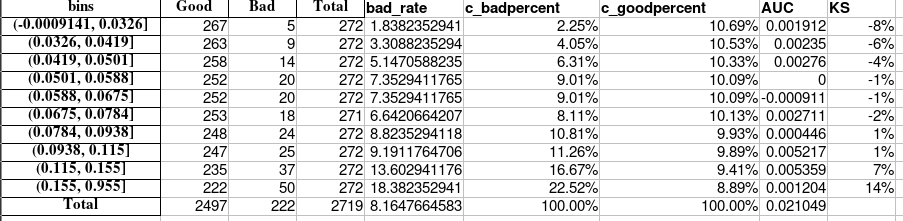


## OOS
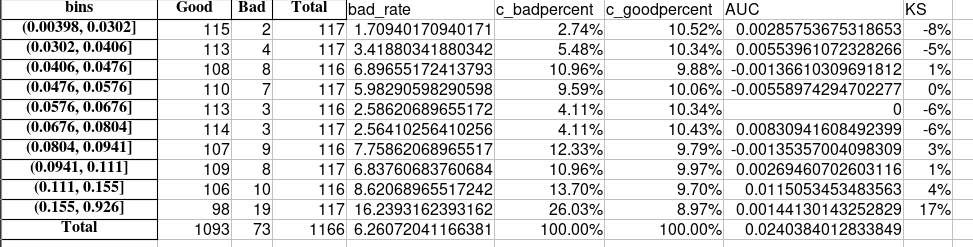
